# Rents in Lagos
Fin for production

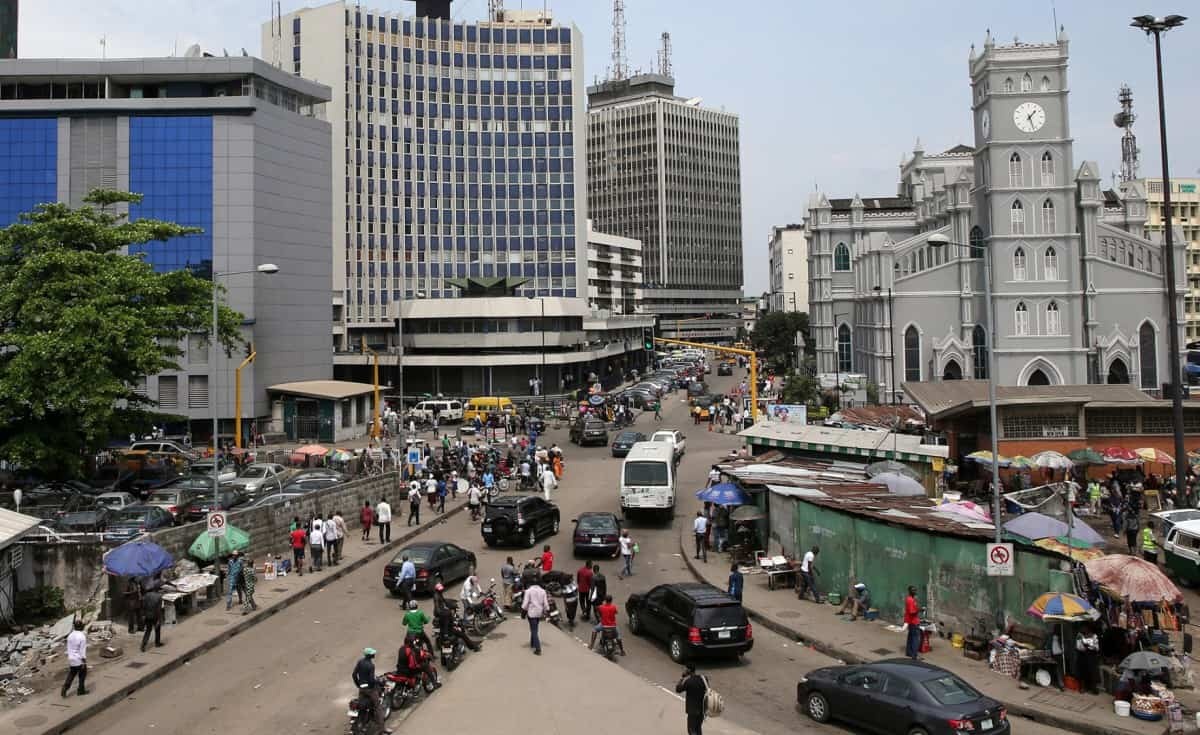

Introduction

In the bustling metropolis of Lagos, the housing market is as dynamic as the city itself. This analysis aims to delve into the details of house rentals across various neighborhoods/areas, bedroom types, and the annual rental prices. By dissecting this data, we seek to uncover patterns that define the cost of living in Africa’s most populous city, providing valuable insights for potential renters, real estate investors, and policymakers alike.

**Dataset Overview:**

- In this project i will be analyzing only the rent prices of a room self, 1,2 and 3 bedrooms spaces.
- I will check the average price to rent each of the above rooms in Lagos
- I will be performing some cleaning and exploratory data analysis (EDA) on this data using pandas and -  visualizing the data with Plotly Express Matplotlib and Seaborn to answer some question about the data.


Remember, these prices listed in this dataset are subject to change and should be verified with current market rates for accuracy.

In [1]:
import pandas as pd
rent_df = pd.read_csv("rent.csv")
#house_sales_df = pd.read_csv('house sales in lagos.csv')

In [2]:
rent_df

,Price,Pid,Property_name,Address
0,"400,000 / year",H1190,1 bedroom mini flat Flat / Apartment for rent ...,Fidiso Estate Abijo Ajah Lagos
1,"14,000,000 / year",G7398,3 bedroom Flat / Apartment for rent Gerrard Ge...,Gerrard Gerrard Gerard Road Ikoyi Lagos
2,"200,000 / year",H5843,1 bedroom mini flat Flat / Apartment for rent ...,Obadia Akoka Yaba Lagos
3,"800,000 / year",H1194,2 bedroom Flat / Apartment for rent Iju Ishaga...,surulere Iju Ishaga Road Gbaja Surulere Lagos
4,"300,000 / year",H5842,1 bedroom mini flat Flat / Apartment for rent ...,Close to Unilag Abule Oja Yaba Lagos
...,...,...,...,...
9848,"400,000 / year",F1443,1 bedroom mini flat Flat / Apartment for rent ...,Alagomeji Alagomeji Yaba Lagos
9849,"800,000",F1442,3 bedroom Flat / Apartment for rent Onike Yaba...,iwaya road Onike Yaba Lagos
9850,"1,000,000 / year",F1441,2 bedroom Flat / Apartment for rent Adekunle Y...,Herbert Macaulay way Adekunle Yaba Lagos
9851,"1,500,000",F1433,3 bedroom Duplex for rent Off Chief Echegile S...,Off Chief Echegile Street Ogudu Orike Ogudu Lagos


# Data Cleaning

# Rent Prices

In [3]:
rent_df.Price

0          400,000 / year
1       14,000,000 / year
2          200,000 / year
3          800,000 / year
4          300,000 / year
              ...        
9848       400,000 / year
9849              800,000
9850     1,000,000 / year
9851            1,500,000
9852            4,000,000
Name: Price, Length: 9853, dtype: object

**Replacing every messy and incorrect input with an empty " " value**

In [4]:
#rent_df.Price = rent_df.Price.str.replace('/ year', '')
#rent_df.Price = rent_df.Price.str.replace(',', '')
##rent_df.Price = rent_df.Price.str.replace(' / sqm', '')
#rent_df.Price = rent_df.Price.str.replace(' / day', '')
#rent_df.Price = rent_df.Price.str.replace(' / sqf', '')

In [4]:
rent_df.Price = rent_df.Price.str.replace('/ year', '').str.replace(',', '').str.replace(' / sqm', '').str.replace(' / day', '').str.replace(' / sqf', '')

#### Converting the prices to numeric data type.

In [5]:
rent_df['Price'] = pd.to_numeric(rent_df['Price'], errors='coerce')

rent_df['Price']

0         400000
1       14000000
2         200000
3         800000
4         300000
          ...   
9848      400000
9849      800000
9850     1000000
9851     1500000
9852     4000000
Name: Price, Length: 9853, dtype: int64

# Rent Address

In [6]:
rent_df.Address

0                          Fidiso Estate Abijo Ajah Lagos
1                 Gerrard Gerrard Gerard Road Ikoyi Lagos
2                                 Obadia Akoka Yaba Lagos
3           surulere Iju Ishaga Road Gbaja Surulere Lagos
4                    Close to Unilag Abule Oja Yaba Lagos
                              ...                        
9848                       Alagomeji Alagomeji Yaba Lagos
9849                          iwaya road Onike Yaba Lagos
9850             Herbert Macaulay way Adekunle Yaba Lagos
9851    Off Chief Echegile Street Ogudu Orike Ogudu Lagos
9852    Census close babs Animashuam Bode Thomas Surul...
Name: Address, Length: 9853, dtype: object

**Spliting the address to get  the area/place and state into a seperate column(s)**

In [7]:
rent_df[["House_Address","Area","State"]] = rent_df["Address"].str.rsplit(" ", n=2, expand=True)
rent_df[["House_Address","Area","State"]] 


,House_Address,Area,State
0,Fidiso Estate Abijo,Ajah,Lagos
1,Gerrard Gerrard Gerard Road,Ikoyi,Lagos
2,Obadia Akoka,Yaba,Lagos
3,surulere Iju Ishaga Road Gbaja,Surulere,Lagos
4,Close to Unilag Abule Oja,Yaba,Lagos
...,...,...,...
9848,Alagomeji Alagomeji,Yaba,Lagos
9849,iwaya road Onike,Yaba,Lagos
9850,Herbert Macaulay way Adekunle,Yaba,Lagos
9851,Off Chief Echegile Street Ogudu Orike,Ogudu,Lagos


In [8]:
rent_df["House_Address"] = rent_df["House_Address"].str.title()
rent_df["House_Address"]

0                            Fidiso Estate Abijo
1                    Gerrard Gerrard Gerard Road
2                                   Obadia Akoka
3                 Surulere Iju Ishaga Road Gbaja
4                      Close To Unilag Abule Oja
                          ...                   
9848                         Alagomeji Alagomeji
9849                            Iwaya Road Onike
9850               Herbert Macaulay Way Adekunle
9851       Off Chief Echegile Street Ogudu Orike
9852    Census Close Babs Animashuam Bode Thomas
Name: House_Address, Length: 9853, dtype: object

In [ ]:
rent_df

# Property Name

In [9]:
rent_df.Property_name

0       1 bedroom mini flat Flat / Apartment for rent ...
1       3 bedroom Flat / Apartment for rent Gerrard Ge...
2       1 bedroom mini flat Flat / Apartment for rent ...
3       2 bedroom Flat / Apartment for rent Iju Ishaga...
4       1 bedroom mini flat Flat / Apartment for rent ...
                              ...                        
9848    1 bedroom mini flat Flat / Apartment for rent ...
9849    3 bedroom Flat / Apartment for rent Onike Yaba...
9850    2 bedroom Flat / Apartment for rent Adekunle Y...
9851    3 bedroom Duplex for rent Off Chief Echegile S...
9852    8 bedroom Duplex for rent babs Animashuam Bode...
Name: Property_name, Length: 9853, dtype: object

**Poping out the place and state leaving behind only the apartment name and type**

In [10]:
rent_df[["property_name","pop","place"]] = rent_df["Property_name"].str.rsplit(" ", n=2, expand=True)
rent_df[["property_name",'pop',"place"]]

,property_name,pop,place
0,1 bedroom mini flat Flat / Apartment for rent ...,Ajah,Lagos
1,3 bedroom Flat / Apartment for rent Gerrard Ge...,Ikoyi,Lagos
2,1 bedroom mini flat Flat / Apartment for rent ...,Yaba,Lagos
3,2 bedroom Flat / Apartment for rent Iju Ishaga...,Surulere,Lagos
4,1 bedroom mini flat Flat / Apartment for rent ...,Yaba,Lagos
...,...,...,...
9848,1 bedroom mini flat Flat / Apartment for rent ...,Yaba,Lagos
9849,3 bedroom Flat / Apartment for rent Onike,Yaba,Lagos
9850,2 bedroom Flat / Apartment for rent Adekunle,Yaba,Lagos
9851,3 bedroom Duplex for rent Off Chief Echegile S...,Ogudu,Lagos


In [11]:
rent_df[["Bed_count","room","Property"]] = rent_df["property_name"].str.split(" ", n=2, expand=True)
rent_df[["Bed_count","room","Property"]]

,Bed_count,room,Property
0,1,bedroom,mini flat Flat / Apartment for rent Abijo
1,3,bedroom,Flat / Apartment for rent Gerrard Gerard road
2,1,bedroom,mini flat Flat / Apartment for rent Akoka
3,2,bedroom,Flat / Apartment for rent Iju Ishaga Road Gbaja
4,1,bedroom,mini flat Flat / Apartment for rent Abule-Oja
...,...,...,...
9848,1,bedroom,mini flat Flat / Apartment for rent Alagomeji
9849,3,bedroom,Flat / Apartment for rent Onike
9850,2,bedroom,Flat / Apartment for rent Adekunle
9851,3,bedroom,Duplex for rent Off Chief Echegile Street Ogud...


In [12]:
rent_df["Bedrooms"] = rent_df["Bed_count"]+' '+rent_df["room"] 
rent_df["Bedrooms"]

0       1 bedroom
1       3 bedroom
2       1 bedroom
3       2 bedroom
4       1 bedroom
          ...    
9848    1 bedroom
9849    3 bedroom
9850    2 bedroom
9851    3 bedroom
9852    8 bedroom
Name: Bedrooms, Length: 9853, dtype: object

In [13]:
rent_df[["rent_type","house_property"]]= rent_df["Property"].str.split("/", n=1, expand=True)
rent_df[["rent_type","house_property"]]

,rent_type,house_property
0,mini flat Flat,Apartment for rent Abijo
1,Flat,Apartment for rent Gerrard Gerard road
2,mini flat Flat,Apartment for rent Akoka
3,Flat,Apartment for rent Iju Ishaga Road Gbaja
4,mini flat Flat,Apartment for rent Abule-Oja
...,...,...
9848,mini flat Flat,Apartment for rent Alagomeji
9849,Flat,Apartment for rent Onike
9850,Flat,Apartment for rent Adekunle
9851,Duplex for rent Off Chief Echegile Street Ogud...,None


**Selcting the columns to use for EDA**

In [14]:
cleaned_rent_df = rent_df[["Price", "Pid", "Bedrooms", "rent_type", "house_property", "House_Address", "Area", "place"]]

In [15]:
cleaned_rent_df

,Price,Pid,Bedrooms,rent_type,house_property,House_Address,Area,place
0,400000,H1190,1 bedroom,mini flat Flat,Apartment for rent Abijo,Fidiso Estate Abijo,Ajah,Lagos
1,14000000,G7398,3 bedroom,Flat,Apartment for rent Gerrard Gerard road,Gerrard Gerrard Gerard Road,Ikoyi,Lagos
2,200000,H5843,1 bedroom,mini flat Flat,Apartment for rent Akoka,Obadia Akoka,Yaba,Lagos
3,800000,H1194,2 bedroom,Flat,Apartment for rent Iju Ishaga Road Gbaja,Surulere Iju Ishaga Road Gbaja,Surulere,Lagos
4,300000,H5842,1 bedroom,mini flat Flat,Apartment for rent Abule-Oja,Close To Unilag Abule Oja,Yaba,Lagos
...,...,...,...,...,...,...,...,...
9848,400000,F1443,1 bedroom,mini flat Flat,Apartment for rent Alagomeji,Alagomeji Alagomeji,Yaba,Lagos
9849,800000,F1442,3 bedroom,Flat,Apartment for rent Onike,Iwaya Road Onike,Yaba,Lagos
9850,1000000,F1441,2 bedroom,Flat,Apartment for rent Adekunle,Herbert Macaulay Way Adekunle,Yaba,Lagos
9851,1500000,F1433,3 bedroom,Duplex for rent Off Chief Echegile Street Ogud...,None,Off Chief Echegile Street Ogudu Orike,Ogudu,Lagos


In [16]:
cleaned_rent_df.duplicated().value_counts()

False    9850
True        3
Name: count, dtype: int64

In [17]:
cleaned_rent_df = cleaned_rent_df.drop_duplicates()

In [18]:
cleaned_rent_df.Area.value_counts()

Area
Lekki        1681
Yaba         1134
Ikeja         815
Ajah          652
Surulere      629
Ikoyi         561
Ojodu         487
Island        485
Gbagada       479
Ikosi         405
Shomolu       310
Ogba          303
Ipaja         245
Okota         221
Isolo         216
Maryland      167
Odofin        143
Ogudu         141
Ikorodu       130
Alimosho      118
Egba          115
Ilupeju        81
Oshodi         76
Agege          48
Igando         39
Ojota          36
Sangotedo      27
Apapa          25
Mushin         24
Idimu          16
Badagry        14
Ejigbo          8
Ojo             6
Lagos           5
Orile           2
Kosofe          2
Berger          2
1               1
Ketu            1
Name: count, dtype: int64

In [19]:
cleaned_rent_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9850 entries, 0 to 9852
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Price           9850 non-null   int64 
 1   Pid             9850 non-null   object
 2   Bedrooms        9850 non-null   object
 3   rent_type       9850 non-null   object
 4   house_property  6460 non-null   object
 5   House_Address   9850 non-null   object
 6   Area            9850 non-null   object
 7   place           9850 non-null   object
dtypes: int64(1), object(7)
memory usage: 692.6+ KB


In [20]:
cleaned_rent_df[cleaned_rent_df["Area"] == "Lekki"]

,Price,Pid,Bedrooms,rent_type,house_property,House_Address,Area,place
14,2500000,H5798,4 bedroom,Duplex for rent Agungi Agungi,None,Agungi Agungi Agungi,Lekki,Lagos
20,1500000,H5788,3 bedroom,Flat,Apartment for rent Orchid Hotel chevron,Chevron Orchid Hotel Chevron,Lekki,Lagos
24,800000,H5783,1 bedroom,mini flat Flat,Apartment for rent Orchid Hotel chevron,Chevron Orchid Hotel Chevron,Lekki,Lagos
25,400000,H5782,3 bedroom,Flat,Apartment for rent New road chevron,Alpha Beach New Road Before Chveron New Road C...,Lekki,Lagos
33,900000,H5758,3 bedroom,Flat,Apartment for rent Mobil road Ilaje,Ilaje Mobil Road Ilaje,Lekki,Lagos
...,...,...,...,...,...,...,...,...
9810,3500000,F1640,4 bedroom,Duplex for rent Lekki chevron,None,Abiola Court Estate Lekki Chevron,Lekki,Lagos
9813,3800000,F1634,5 bedroom,Duplex for rent Agungi Agungi,None,Atlantic View Estate Agungi Agungi,Lekki,Lagos
9816,2500000,F1606,3 bedroom,Flat,Apartment for rent Lekki Garden Estate Ikate,Lekki Horizon 2 Ikate Lekki Garden Estate Ikate,Lekki,Lagos
9822,4500000,F1558,2 bedroom,Flat,"Apartment for rent Oniru, Lekki Phase 1","Oniru, Lekki Phase 1",Lekki,Lagos


**Function to print the coordinate of the areas in the dataset**

In [22]:
def update_coordinates(dataframe, area, latitude, longitude):
    """
    Updating the latitude and longitude for a given area in the DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing rent data.
        area (str): The area name.
        latitude (float): The latitude value.
        longitude (float): The longitude value.
    """
    area_rows = cleaned_rent_df[cleaned_rent_df["Area"] == area]
    dataframe.loc[area_rows.index, 'Latitude'] = latitude
    dataframe.loc[area_rows.index, 'Longitude'] = longitude

# Example usage:
update_coordinates(cleaned_rent_df, area="Lekki", latitude=6.472516, longitude=3.568616)
update_coordinates(cleaned_rent_df, area="Yaba", latitude=6.454070, longitude=3.394670)



#vi_row = cleaned_rent_df[cleaned_rent_df["Area"] == "Island"]
#cleaned_rent_df.loc[vi_row.index, 'Latitude'] = 6.4280556
#cleaned_rent_df.loc[vi_row.index, 'Longitude'] = 3.4219444
#cleaned_rent_df[cleaned_rent_df["Area"] == "Island"]


In [23]:
cleaned_rent_df.Area.value_counts()

Area
Lekki        1681
Yaba         1134
Ikeja         815
Ajah          652
Surulere      629
Ikoyi         561
Ojodu         487
Island        485
Gbagada       479
Ikosi         405
Shomolu       310
Ogba          303
Ipaja         245
Okota         221
Isolo         216
Maryland      167
Odofin        143
Ogudu         141
Ikorodu       130
Alimosho      118
Egba          115
Ilupeju        81
Oshodi         76
Agege          48
Igando         39
Ojota          36
Sangotedo      27
Apapa          25
Mushin         24
Idimu          16
Badagry        14
Ejigbo          8
Ojo             6
Lagos           5
Orile           2
Kosofe          2
Berger          2
1               1
Ketu            1
Name: count, dtype: int64

# Exploratory Analysis

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
#import squarify
%matplotlib inline
sns.set_palette("dark")

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'



import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'



# Self Contain

In [25]:
self_con_df = cleaned_rent_df[cleaned_rent_df['Bedrooms'].isin(['Self Contain'])].sort_values("Price", ascending=False)
self_con_df

,Price,Pid,Bedrooms,rent_type,house_property,House_Address,Area,place,Latitude,Longitude
537,1500000,H5017,Self Contain,for rent Adeola Odeku Victoria,None,"Off Adeola Odeku Street, Victoria Island Adeol...",Island,Lagos,6.428056,3.421944
7194,1500000,F9606,Self Contain,for rent Eric Moore Heights Bode Thomas,None,Royal Estate Close Eric Moore Heights Bode Thomas,Surulere,Lagos,NaN,NaN
5137,1400000,D0408,Self Contain,for rent oniru Victoria Island Extension Victoria,None,Near City Of David Oniru Victoria Island Exten...,Island,Lagos,6.428056,3.421944
727,1200000,H4704,Self Contain,for rent Lekki Phase 1,None,Lekki Phase 1 Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
7887,900000,F7680,Self Contain,for rent Eric Moore Heights Bode Thomas,None,Royal Estate Close Eric Moore Heights Bode Thomas,Surulere,Lagos,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6767,100000,G0777,Self Contain,for rent Ayobo,None,Ayobo Ayobo,Ipaja,Lagos,NaN,NaN
4009,100000,G7702,Self Contain,for rent Lasu area iyana school Iba,None,Joy Street Lasu Area Iyana School Iba,Ojo,Lagos,NaN,NaN
7472,100000,F8982,Self Contain,for rent Jibowu Estate Ojokoro Abule,None,Anastasia Layout Jibowu Estate Ojokoro Abule,Egba,Lagos,NaN,NaN
3319,90000,G9385,Self Contain,for rent Ayobo,None,"Olayemi, Ayobo Ayobo",Ipaja,Lagos,NaN,NaN


**This data shows some incorrect inputs of some prices of rents in some palces. Ther are some ouliers in the data; the last 5 data are incorrect. After conducting  some combing on rent prices in these affected areas where the prices are relatively low and checking the least price to get a room in lagos, it was discorvered that to even get a face me i face you is more than  N2e5.**


### Filtering out the outliers values  by displaying only the values that is greater than N2e5

In [26]:
self_con_filtered = self_con_df[(self_con_df['Price'] > 200000) ].sort_values("Price",ascending=False)
self_con_filtered

,Price,Pid,Bedrooms,rent_type,house_property,House_Address,Area,place,Latitude,Longitude
537,1500000,H5017,Self Contain,for rent Adeola Odeku Victoria,None,"Off Adeola Odeku Street, Victoria Island Adeol...",Island,Lagos,6.428056,3.421944
7194,1500000,F9606,Self Contain,for rent Eric Moore Heights Bode Thomas,None,Royal Estate Close Eric Moore Heights Bode Thomas,Surulere,Lagos,NaN,NaN
5137,1400000,D0408,Self Contain,for rent oniru Victoria Island Extension Victoria,None,Near City Of David Oniru Victoria Island Exten...,Island,Lagos,6.428056,3.421944
727,1200000,H4704,Self Contain,for rent Lekki Phase 1,None,Lekki Phase 1 Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
7887,900000,F7680,Self Contain,for rent Eric Moore Heights Bode Thomas,None,Royal Estate Close Eric Moore Heights Bode Thomas,Surulere,Lagos,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2398,230000,H1607,Self Contain,for rent Onike,None,Onike Onike,Yaba,Lagos,6.454070,3.394670
2550,230000,H1243,Self Contain,for rent University of Lagos Exit Gate. Onike,None,Olumo Street University Of Lagos Exit Gate. Onike,Yaba,Lagos,6.454070,3.394670
4087,230000,G7465,Self Contain,for rent Shomolu,None,Palmgroove Shomolu,Shomolu,Lagos,NaN,NaN
4100,220000,G7444,Self Contain,for rent Sabo,None,Onike Sabo,Yaba,Lagos,6.454070,3.394670


### The statistical view

In [27]:
stat_view = self_con_filtered.Price.describe().reset_index()
stat_view.columns = ['statistics', 'value']
stat_view

,statistics,value
0,count,1.110000e+02
1,mean,3.847748e+05
2,std,2.505806e+05
3,min,2.200000e+05
4,25%,2.500000e+05
5,50%,3.000000e+05
6,75%,4.000000e+05
7,max,1.500000e+06


**Filtering to visualize the Average Price, Maximum and Minimum price to rent a room self in lagos**

In [28]:
stat_filtered = stat_view.loc[[1, 3, 5, 7]]

In [29]:
fig = px.bar(stat_filtered, x='statistics', y='value',color='value',
             text='value', opacity=1)

#Customize the y-axis tick labels
fig.update_layout(
                    height=400,template='plotly_dark',
                    font=dict(family="Arial", size=13, color="white"),
                    xaxis_title=" Average Price",  # Added x-axis title
                    title="Average, Min, Middle And Max Price To Rent A Self-Contain in Lagos",
                    title_font=dict(size=18),
                    title_x=0.5, title_y=0.95, title_xanchor='center',
                    )
fig.update_traces(texttemplate=' N%{text:.0f}', textfont_size=20, textsrc="white",textposition="outside",marker_color=['orange','red','purple','green'])
fig.update_yaxes(showgrid=False, range=[0, 1500000 +200000])

fig.show()

Base on the statistical data from the image, it  depicts the cost of renting a self-contained room in Lagos. It highlights four key price points:
- The **average** (mean) rent is **₦384,775**. Which means you must have @least this amount to be able to rent a self-contained room in lagos.
- The **minimum** rent observed is **₦220,000**.
- The **median** rent, indicating the middle price point where half of the rents are lower, is **₦300,000**.
- The **maximum** rent can soar up to **₦1,500,000** or above base on the area.

The image provides a clear visual representation of the rental price range for a self-contained room in Lagos, showcasing the diversity in accommodation costs within lagos.



**Grouping the data by Area to get the average price to get a room self in the enlisted areas/places**

In [30]:
self_con_grouped_df=  self_con_filtered.groupby("Area")[["Price"]].mean().reset_index().sort_values("Price", ascending=False)
self_con_grouped_df

,Area,Price
5,Island,1.183333e+06
4,Ikoyi,8.000000e+05
7,Lekki,6.153846e+05
13,Surulere,5.571429e+05
0,Ajah,4.142857e+05
8,Maryland,3.800000e+05
2,Ikeja,3.500000e+05
3,Ikosi,3.250000e+05
14,Yaba,3.026415e+05
6,Isolo,3.000000e+05


In [32]:
fig = px.bar(self_con_grouped_df, x='Price', y='Area', orientation='h',color='Price',
             #hover_data=["Name","Global_Sales", "Publisher", "Year"],
             color_continuous_scale="ylorbr",
            
            text='Price', opacity=1)

#Customize the y-axis tick labels
fig.update_layout(yaxis={"dtick":1, 'categoryorder':'total ascending'},
                    height=500,template='plotly_dark',
                    font=dict(family="Arial", size=13, color="orange"),
                    xaxis_tickformat=",",
                    xaxis_title=" Average Price",  # Added x-axis title
                    title="rental prices for self-contained units in various areas of Lagos".title(),
                    title_font=dict(size=18),
                    title_x=0.5, title_y=0.95, title_xanchor='center',
                    )
fig.update_traces(texttemplate=' N%{text:.0f}', textfont_size=20, textsrc="white")

#yaxis_title="Population (2023)",  font=dict(family="Arial", size=13))
fig.show()

The image illustrates the average rental prices for self-contained units in various areas of Lagos. The graph shows a significant variation in prices across different neighborhoods:
- **Victoria Island** stands out as the most expensive area, with the rent exceeding **₦1,000,000**.
- On the other end of the graph, **Oshodi, Ojodu, Shomolu, Gbagada** offers the most affordable options, with average rents just above **₦200,000**.
- Other areas like **Ikoyi**, **Surulere**,**Lekki** and **Ajah** fall in between these two ends, with their average rents depicted on the graph.





## Getting the Mean, Max and Min Prices of these areas

In [33]:
selfcon_agg = self_con_filtered.groupby("Area")[["Price"]].agg((['mean', 'max', 'min'])).reset_index()
selfcon_agg

Area         Price                 
                      mean      max     min
0       Ajah  4.142857e+05   550000  300000
1    Gbagada  2.875000e+05   350000  250000
2      Ikeja  3.500000e+05   350000  350000
3      Ikosi  3.250000e+05   350000  300000
4      Ikoyi  8.000000e+05   800000  800000
5     Island  1.183333e+06  1500000  650000
6      Isolo  3.000000e+05   300000  300000
7      Lekki  6.153846e+05  1200000  250000
8   Maryland  3.800000e+05   380000  380000
9      Ogudu  3.000000e+05   350000  250000
10     Ojodu  2.500000e+05   250000  250000
11    Oshodi  2.400000e+05   250000  230000
12   Shomolu  2.584615e+05   300000  230000
13  Surulere  5.571429e+05  1500000  250000
14      Yaba  3.026415e+05   600000  220000

In [34]:
selfcon_agg.columns = ['Area', 'Mean Price', 'Max Price', 'Min Price']
selfcon_agg


,Area,Mean Price,Max Price,Min Price
0,Ajah,4.142857e+05,550000,300000
1,Gbagada,2.875000e+05,350000,250000
2,Ikeja,3.500000e+05,350000,350000
3,Ikosi,3.250000e+05,350000,300000
4,Ikoyi,8.000000e+05,800000,800000
5,Island,1.183333e+06,1500000,650000
6,Isolo,3.000000e+05,300000,300000
7,Lekki,6.153846e+05,1200000,250000
8,Maryland,3.800000e+05,380000,380000
9,Ogudu,3.000000e+05,350000,250000


### Creating a bidirectional barchart to display the Max and Min Prices

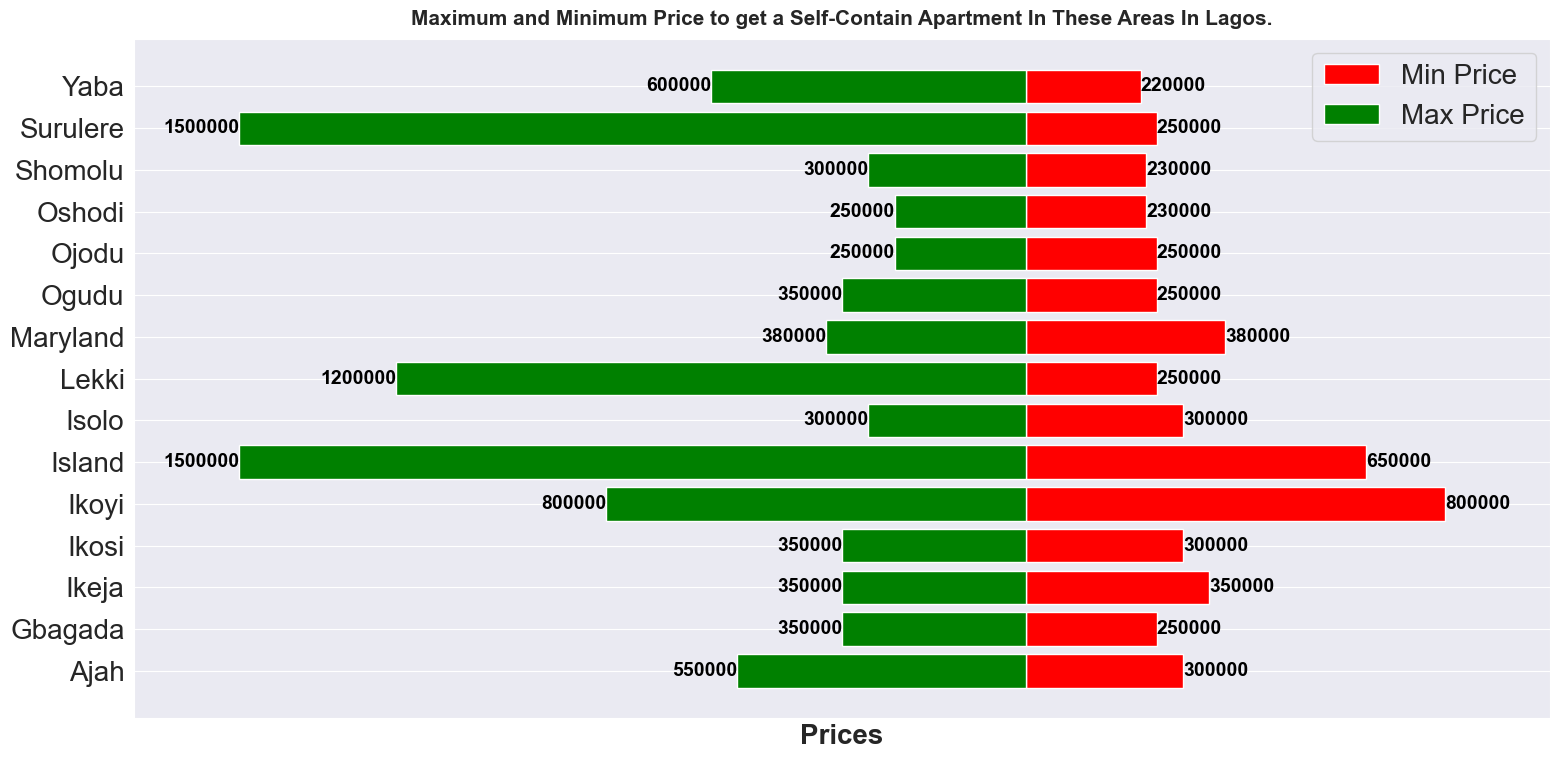

In [35]:

# Create the bidirectional bar chart
fig, ax = plt.subplots(figsize=(16, 8))
ax.barh(selfcon_agg['Area'], selfcon_agg['Min Price'], color='red', label='Min Price')
ax.barh(selfcon_agg['Area'], -selfcon_agg['Max Price'], color='green', label='Max Price')


for i, value in enumerate(selfcon_agg['Min Price']):
    ax.text(value + 2, i, f'{value}', va='center', ha='left', color='black', fontweight='bold', fontsize=14)

for i, value in enumerate(selfcon_agg['Max Price']):
    ax.text(-abs(value) -2, i, f'{abs(value)}', va='center', ha='right', color='black', fontweight='bold', fontsize=14)

ax.set_xticks([])
# Customize the plot
ax.set_xlim(-1.7e6, 1e6)  # Set the x-axis limits
ax.set_xlabel('Prices', fontweight='bold')
ax.set_title('Maximum and Minimum Price to get a Self-Contain Apartment In These Areas In Lagos.', fontsize="15", fontweight='bold', pad=10)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

This graph shows the maximum and minimum rental prices for self-contained apartments in various areas of Lagos. 

- **Minimum Prices**: Most areas have a consistent minimum price around **₦250,000**, except for Island which has a higher minimum at **₦650,000**.
- **Maximum Prices**: There's a wider variation in maximum prices. Surulere and Island stand out with notably high maximum prices at **₦1,500,000**.
- **Price Range**: The graph indicates that while some areas have a wide range of rental prices, others are more uniform.

Therefore for individuals looking to rent within a specific budget, this graph  highlights the areas with the most affordable options and those that are more premium. It also suggests that whoever that is planning to rent  a house in Island should expect to budget more even for lower-priced rentals.


# 1 Bedroom Space

In [37]:
df_1bedroom= cleaned_rent_df[cleaned_rent_df['Bedrooms'].isin(['1 bedroom'])].sort_values("Price", ascending=False)
df_1bedroom

,Price,Pid,Bedrooms,rent_type,house_property,House_Address,Area,place,Latitude,Longitude
1397,40000000,H3690,1 bedroom,mini flat Flat,Apartment for rent Ketu,Alapere Ketu Ketu Kosofe,Ikosi,Lagos,NaN,NaN
4472,12000000,G6497,1 bedroom,mini flat Commercial Property for rent By Eleg...,None,By Eleganza Ajao Estate,Isolo,Lagos,NaN,NaN
6463,10800000,"18,F7404",1 bedroom,mini flat Flat,Apartment for rent Sangotedo Shoprite Zone Sa...,Beside Oando Sangotedo Shoprite Zone Sangotedo,Ajah,Lagos,NaN,NaN
3034,10000000,G6692,1 bedroom,mini flat Office Space for rent Salvation Junc...,None,Salvation Junction Opebi,Ikeja,Lagos,NaN,NaN
2035,9000000,H2329,1 bedroom,mini flat Flat,Apartment for rent Banana Island Banana Island,Banana Island Banana Island Banana Island,Ikoyi,Lagos,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5157,18000,G4429,1 bedroom,mini flat Office Space for rent Allen Avenue,None,Allen Avenue,Ikeja,Lagos,NaN,NaN
5246,15000,G4228,1 bedroom,mini flat Office Space for rent Oregun,None,Oregun,Ikeja,Lagos,NaN,NaN
9554,8000,F2587,1 bedroom,mini flat Self Contain for rent Oniru Victoria...,None,Oniru Victoria Island Extension Victoria,Island,Lagos,6.428056,3.421944
2245,800,H1878,1 bedroom,mini flat Office Space for rent Victoria Islan...,None,Victoria Island Victoria Island Ligali Ayorind...,Island,Lagos,6.428056,3.421944



### Filtering out the outliers values  by displaying only the values that is greater than N2e5

In [38]:
df_1bedroom_filtered = df_1bedroom[(df_1bedroom['Price'] <= 5000000) & (df_1bedroom['Price'] >= 200000)].sort_values("Price",ascending=False)

df_1bedroom_filtered

,Price,Pid,Bedrooms,rent_type,house_property,House_Address,Area,place,Latitude,Longitude
8956,5000000,F4479,1 bedroom,mini flat Flat,Apartment for rent Airport Road(Ikeja),Osolo Way Airport Road(Ikeja),Ikeja,Lagos,NaN,NaN
8857,5000000,F4828,1 bedroom,"mini flat Self Contain for rent Oniru, 1004 Vi...",None,"Oniru, 1004 Victoria",Island,Lagos,6.428056,3.421944
4575,5000000,G6129,1 bedroom,mini flat Flat,Apartment for rent Shonibare Estate Mobolaji ...,Shonibare Estate Shonibare Estate Mobolaji Ban...,Ikeja,Lagos,NaN,NaN
1096,5000000,H4047,1 bedroom,mini flat House for rent Lekki Phase 1,None,Lekki Phase 1 Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
3619,4500000,G8747,1 bedroom,mini flat Flat,Apartment for rent Ademola Adetokunbo Victoria,Victoria Island Ademola Adetokunbo Victoria,Island,Lagos,6.428056,3.421944
...,...,...,...,...,...,...,...,...,...,...
9064,200000,F4180,1 bedroom,mini flat Self Contain for rent Lawanson,None,Obele Axis In Lawanson Surulere Lawanson,Surulere,Lagos,NaN,NaN
6586,200000,G1328,1 bedroom,mini flat Flat,Apartment for rent Obanikoro,"Obaniko Road Extension, Close To Charley Boy O...",Shomolu,Lagos,NaN,NaN
5309,200000,G4046,1 bedroom,mini flat Self Contain for rent Gowon Estate,None,"Transable, Very Close To Ponle Bustop Gowon Es...",Ipaja,Lagos,NaN,NaN
1040,200000,H4132,1 bedroom,mini flat Flat,Apartment for rent New Garage Bariga,Bello Street Odunsi New Garage Bariga,Shomolu,Lagos,NaN,NaN


#### Getting the statitical data of the price column and visualizing it to know the  must have amount to get a bed room flat in Lagos. 

In [39]:
stat_view1 = df_1bedroom_filtered.Price.describe().reset_index()
stat_view1.columns = ['statistics', 'value']
stat_view1

,statistics,value
0,count,1.073000e+03
1,mean,5.761417e+05
2,std,5.914432e+05
3,min,2.000000e+05
4,25%,3.000000e+05
5,50%,4.000000e+05
6,75%,5.000000e+05
7,max,5.000000e+06


In [40]:
stat_filtered1 = stat_view1.loc[[1, 3, 5, 7]]

In [41]:
fig = px.bar(stat_filtered1, x='statistics', y='value',color='value',
             text='value', opacity=1)

#Customize the y-axis tick labels
fig.update_layout(
                    height=500,template='plotly_dark',
                    font=dict(family="Arial", size=13, color="white"),
                    xaxis_title=" Average Price",  # Added x-axis title
                    title="Average, Min, Middle And Max Price To Rent A Room-Bed in Lagos",
                    title_font=dict(size=18),
                    title_x=0.5, title_y=0.95, title_xanchor='center',
                    )
fig.update_traces(texttemplate=' N%{text:.0f}', textfont_size=20, textsrc="white",textposition="outside",marker_color=['orange','red','purple','green'])
fig.update_yaxes(showgrid=False, range=[0, 5e6 +4e5])

fig.show()

Base on the statistical data from the figure, it shows the cost of renting 1 Bedroom mini-flat in Lagos. It depicts four key price points:
- The **average** (mean) rent is **₦576,142**. 
- The **minimum** rent observed is **₦200,000**.
- The **median** rent, indicating the middle price point where half of the rents are lower, is **₦400,000**.
- The **maximum** rent can soar up to **₦5,000,000** or above base on the area.

The image provides a clear visual representation of the rental price range for 1bedroom in Lagos.

### Grouping the Areas and  Aggregating the Prices to find the average price to rent a bedroom flat 

In [42]:
grouped_df=  df_1bedroom_filtered.groupby("Area")[["Price"]].mean().reset_index().sort_values("Price", ascending=False)
grouped_df

,Area,Price
14,Island,2.221739e+06
11,Ikoyi,1.890000e+06
18,Lekki,1.164364e+06
8,Ikeja,9.524528e+05
19,Maryland,7.708333e+05
16,Kosofe,7.000000e+05
12,Ilupeju,5.947368e+05
15,Isolo,5.491304e+05
21,Odofin,5.464286e+05
30,Surulere,4.813566e+05


## Visualizing the output

In [43]:
fig = px.bar(grouped_df, x='Price', y='Area', orientation='h',color='Price',
             #hover_data=["Name","Global_Sales", "Publisher", "Year"],
             color_continuous_scale="emrld_r",
            
            text='Price', opacity=1)

#Customize the y-axis tick labels
fig.update_layout(yaxis={"dtick":1, 'categoryorder':'total ascending'},
                    height=600,template='plotly_dark',
                    font=dict(family="Arial", size=13, color=" springgreen"),
                    xaxis_title=" Average Price",  # Added x-axis title
                    title="Average Price To Rent 1 Room Bed At These Areas in Lagos",
                    title_font=dict(size=18),
                    title_x=0.5, title_y=0.95, title_xanchor='center',
                    )
fig.update_traces(texttemplate=' N%{text:.0f}', textfont_size=15,textposition="outside")

fig.update_xaxes(showgrid=False, range=[0, 2.221739e+06  + 300000])

#yaxis_title="Population (2023)",  font=dict(family="Arial", size=13))
fig.show()

This image illustrates the average rental prices for self-contained units in various areas of Lagos. The graph shows a significant prices to rent a mini flat across different areas of lagos:
- **Victoria Island** still standing  out as the most expensive area, with the average rent exceeding **₦2,000,000**, followed by **Ikoyi and Lekki** also exceeding **N1,600,000**.
- Moreso, areas like **Ikorodu, Badagry, Agege, Ipaja, Idimu, Alimosho, Mushin and Oshodi** offers the most affordable options, with average rents below **₦300,000**.
- The center of excellence's capital city offers an average price slightly below **N1,000,000**.




### Also Aggregating  the Price to find the Maximum and Minimum Price one can get a bedroom in these areas

In [44]:
agg_1bed = df_1bedroom_filtered.groupby("Area")[["Price"]].agg((['mean', 'max', 'min'])).reset_index()
agg_1bed

Area         Price                 
                       mean      max     min
0       Agege  2.250000e+05   230000  220000
1        Ajah  3.954000e+05  1300000  200000
2    Alimosho  2.660714e+05   350000  200000
3     Badagry  2.250000e+05   250000  200000
4        Egba  3.500000e+05   450000  250000
5     Gbagada  4.187097e+05   600000  200000
6       Idimu  2.500000e+05   250000  250000
7      Igando  3.000000e+05   300000  300000
8       Ikeja  9.524528e+05  5000000  250000
9     Ikorodu  2.166667e+05   250000  200000
10      Ikosi  4.462857e+05  1000000  200000
11      Ikoyi  1.890000e+06  4000000  800000
12    Ilupeju  5.947368e+05  3600000  300000
13      Ipaja  2.455556e+05   400000  200000
14     Island  2.221739e+06  5000000  600000
15      Isolo  5.491304e+05  3500000  200000
16     Kosofe  7.000000e+05   700000  700000
17      Lagos  3.500000e+05   350000  350000
18      Lekki  1.164364e+06  5000000  200000
19   Maryland  7.708333e+05  2000000  250000
20     Mushin  2.750000e+05   300000  250000
21     Odofin  5.464286e+05  1500000  250000
22       Ogba  3.454167e+05  1000000  200000
23      Ogudu  4.433333e+05  1000000  250000
24      Ojodu  4.263158e+05   800000  250000
25      Ojota  3.800000e+05   500000  300000
26      Okota  3.563636e+05   500000  250000
27     Oshodi  2.870000e+05   400000  250000
28  Sangotedo  4.100000e+05   500000  350000
29    Shomolu  3.497701e+05  1800000  200000
30   Surulere  4.813566e+05  4500000  200000
31       Yaba  3.764634e+05  3000000  200000

In [45]:
agg_1bed.columns = ['Area', 'mean_price', 'max_price', 'min_price']
agg_1bed


,Area,mean_price,max_price,min_price
0,Agege,2.250000e+05,230000,220000
1,Ajah,3.954000e+05,1300000,200000
2,Alimosho,2.660714e+05,350000,200000
3,Badagry,2.250000e+05,250000,200000
4,Egba,3.500000e+05,450000,250000
5,Gbagada,4.187097e+05,600000,200000
6,Idimu,2.500000e+05,250000,250000
7,Igando,3.000000e+05,300000,300000
8,Ikeja,9.524528e+05,5000000,250000
9,Ikorodu,2.166667e+05,250000,200000


### Visualizing the aggregated output

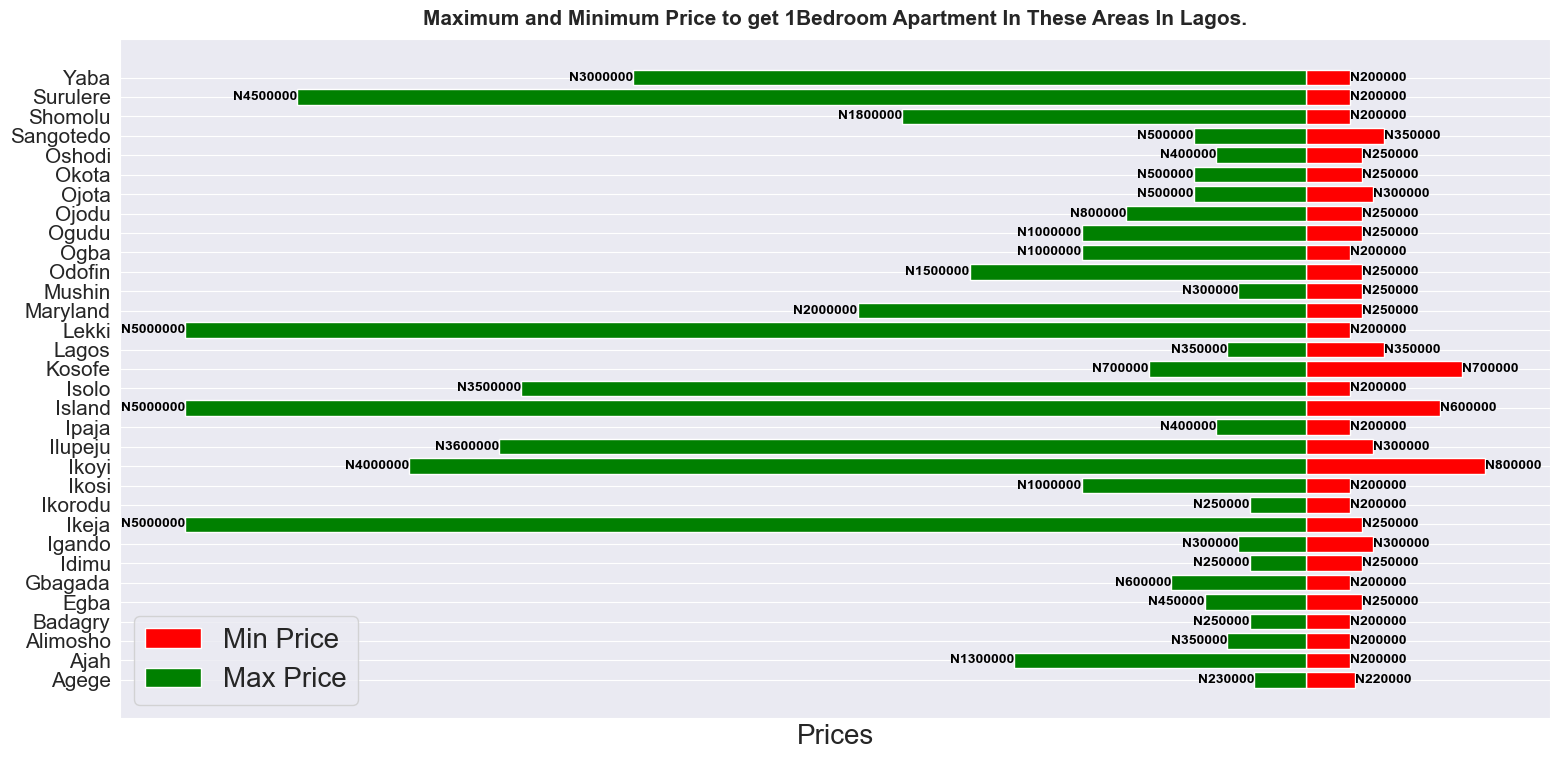

In [46]:
# Create the bidirectional bar chart
fig, ax = plt.subplots(figsize=(16, 8))
ax.barh(agg_1bed['Area'], agg_1bed['min_price'], color='red', label='Min Price')
ax.barh(agg_1bed['Area'], -agg_1bed['max_price'], color='green', label='Max Price')


for i, value in enumerate(agg_1bed['min_price']):
    ax.text(value + 2, i, f'N{value}', va='center', ha='left', color='black', fontweight='bold', fontsize=10)

for i, value in enumerate(agg_1bed['max_price']):
    ax.text(-abs(value) -2, i, f'N{abs(value)}', va='center', ha='right', color='black', fontweight='bold', fontsize=10)

ax.set_xticks([])

#ax.set_xlim(-5.5e6, 1.5e6)  # Set the x-axis limits
# Set the font size of the y-axis tick labels to 8 (or any other desired size)
plt.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Prices')
ax.set_title('Maximum and Minimum Price to get 1Bedroom Apartment In These Areas In Lagos.', pad=10, fontsize=15, fontweight='bold')
#ax.legend(loc='upper right')
# Move the legend outside of the plot area
ax.legend(loc='lower left')#, bbox_to_anchor=(0, 0.9))

plt.tight_layout()
plt.show()

The image  illustrates the rental price range for one-bedroom apartments in various areas of Lagos. It shows two bars for each area, indicating the minimum and maximum prices. Areas like **Lekki, Ikeja, surulere, ikoyi and Victoria Islan**are on the higher end of the price spectrum, while places like Mushin, Ojodu, ikorodu among others are more affordable. 

This visual data can help individuals or real estate professionals understand the market and make informed decisions based on their budget or investment criteria.

### Checking some of the most expensive areas and the addresses where these apartment are actually located in the areas.

In [47]:
df_1bedroom_filtered.Area.value_counts()

Area
Yaba         246
Surulere     129
Lekki        118
Shomolu       87
Ajah          75
Gbagada       62
Ikeja         53
Ikosi         35
Ogudu         30
Ogba          24
Maryland      24
Isolo         23
Island        23
Ilupeju       19
Ojodu         19
Ipaja         18
Odofin        14
Alimosho      14
Okota         11
Ikoyi         10
Oshodi        10
Ikorodu        6
Sangotedo      5
Ojota          5
Idimu          2
Badagry        2
Agege          2
Mushin         2
Egba           2
Igando         1
Lagos          1
Kosofe         1
Name: count, dtype: int64

# Lekki 

In [48]:
df1_bed = df_1bedroom_filtered[df_1bedroom_filtered["Area"] == "Lekki"].head(40)
df1_bed

,Price,Pid,Bedrooms,rent_type,house_property,House_Address,Area,place,Latitude,Longitude
1096,5000000,H4047,1 bedroom,mini flat House for rent Lekki Phase 1,None,Lekki Phase 1 Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
1821,3000000,H2807,1 bedroom,mini flat Flat,Apartment for rent Elegushi Ikate,Romay Garden Elegushi Ikate,Lekki,Lagos,6.472516,3.568616
4168,2800000,G4230,1 bedroom,mini flat Office Space for rent Maruwa round a...,None,Emmauel Ayo Street Lekki Maruwa Round About Le...,Lekki,Lagos,6.472516,3.568616
335,2500000,H0747,1 bedroom,mini flat Office Space for rent Lekki Phase 1,None,Admiralty Way Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
6197,2500000,"48,G2064",1 bedroom,mini flat Office Space for rent Lekki Phase 1,None,Lekki Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
2691,2500000,H0949,1 bedroom,mini flat Flat,Apartment for rent,Goshen Estate,Lekki,Lagos,6.472516,3.568616
8769,2000000,F5064,1 bedroom,mini flat Shop for rent Oniru Lekki Phase 1,None,Market Street Oniru Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
4987,2000000,G4956,1 bedroom,mini flat Flat,Apartment for rent Lekki Phase 1,Lekki Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
2226,2000000,H1904,1 bedroom,mini flat Flat,Apartment for rent Lekki Phase 1,Off Oniru Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
2751,1800000,H0824,1 bedroom,mini flat Shop for rent Lekki Right Lekki Phase 1,None,Lekki Right Lekki Phase 1,Lekki,Lagos,6.472516,3.568616


In [49]:
# Replacing the Lekki Phase 1 Lekki Ph 1 Lekki Phase 1 values with Lekki Phase 1
df1_bed_lekki = df1_bed[df1_bed["Area"] == "Lekki"]
df1_bed_lekki.loc[[1096, 6197,4987, 6387,5578,8981],'House_Address' ]= 'Lekki Phase 1'
df1_bed_lekki

,Price,Pid,Bedrooms,rent_type,house_property,House_Address,Area,place,Latitude,Longitude
1096,5000000,H4047,1 bedroom,mini flat House for rent Lekki Phase 1,None,Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
1821,3000000,H2807,1 bedroom,mini flat Flat,Apartment for rent Elegushi Ikate,Romay Garden Elegushi Ikate,Lekki,Lagos,6.472516,3.568616
4168,2800000,G4230,1 bedroom,mini flat Office Space for rent Maruwa round a...,None,Emmauel Ayo Street Lekki Maruwa Round About Le...,Lekki,Lagos,6.472516,3.568616
335,2500000,H0747,1 bedroom,mini flat Office Space for rent Lekki Phase 1,None,Admiralty Way Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
6197,2500000,"48,G2064",1 bedroom,mini flat Office Space for rent Lekki Phase 1,None,Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
2691,2500000,H0949,1 bedroom,mini flat Flat,Apartment for rent,Goshen Estate,Lekki,Lagos,6.472516,3.568616
8769,2000000,F5064,1 bedroom,mini flat Shop for rent Oniru Lekki Phase 1,None,Market Street Oniru Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
4987,2000000,G4956,1 bedroom,mini flat Flat,Apartment for rent Lekki Phase 1,Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
2226,2000000,H1904,1 bedroom,mini flat Flat,Apartment for rent Lekki Phase 1,Off Oniru Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
2751,1800000,H0824,1 bedroom,mini flat Shop for rent Lekki Right Lekki Phase 1,None,Lekki Right Lekki Phase 1,Lekki,Lagos,6.472516,3.568616


In [50]:
fig = px.bar(df1_bed_lekki, x='Price', y='House_Address', orientation='h',color='Price',
             hover_data=["Area","House_Address", "Price"],
             color_continuous_scale="ylorbr",
            
            text='Price', opacity=1)

#Customize the y-axis tick labels
fig.update_layout(yaxis={"dtick":1, 'categoryorder':'total ascending'},
                    height=500,template='plotly_dark',
                    font=dict(family="Arial", size=8, color="orange"),
                    xaxis_tickformat=",",
                    xaxis_title="Prices",  # Added x-axis title
                    title="Areas Where To Rent A Self-Contain And Their Prices In Lekki(Max to Min)",
                    title_font=dict(size=18),
                    title_x=0.5, title_y=0.95, title_xanchor='center',
                    )
fig.update_traces(texttemplate=' N%{text:.0f}', textfont_size=13, textsrc="white",textposition="outside")
fig.update_xaxes(showgrid=False, range=[0, 14e6  + 2e6])
#yaxis_title="Population (2023)",  font=dict(family="Arial", size=13))
fig.show()

# Victoria Island

In [51]:
df1_bedvi = df_1bedroom_filtered[df_1bedroom_filtered["Area"] == "Island"]
df1_bedvi


,Price,Pid,Bedrooms,rent_type,house_property,House_Address,Area,place,Latitude,Longitude
8857,5000000,F4828,1 bedroom,"mini flat Self Contain for rent Oniru, 1004 Vi...",None,"Oniru, 1004 Victoria",Island,Lagos,6.428056,3.421944
3619,4500000,G8747,1 bedroom,mini flat Flat,Apartment for rent Ademola Adetokunbo Victoria,Victoria Island Ademola Adetokunbo Victoria,Island,Lagos,6.428056,3.421944
7560,3500000,F8729,1 bedroom,mini flat Flat,Apartment for rent Kofo Abayomi Victoria,"Off Idowu Martins Street, Victoria Island, Lag...",Island,Lagos,6.428056,3.421944
1828,3100000,H2793,1 bedroom,mini flat Flat,Apartment for rent Victoria Island Ahmadu Bel...,Victoria Island Victoria Island Ahmadu Bello W...,Island,Lagos,6.428056,3.421944
730,3000000,H1031,1 bedroom,mini flat Flat,Apartment for rent adeola Odeku Adeola Odeku ...,"Off Idejo Street, Victoria Island Lagos. Adeol...",Island,Lagos,6.428056,3.421944
8771,2500000,F5058,1 bedroom,mini flat Office Space for rent Adeola odeku A...,None,Adeola Odeku Adeola Odeku Adeola Odeku Victoria,Island,Lagos,6.428056,3.421944
7108,2500000,F9794,1 bedroom,mini flat Flat,Apartment for rent Victoria Island Extension ...,Water Corporation Victoria Island Extension Vi...,Island,Lagos,6.428056,3.421944
3346,2500000,G9311,1 bedroom,mini flat Flat,Apartment for rent Adeola Odeku Victoria,Off Idowu Martins Street Adeola Odeku Victoria,Island,Lagos,6.428056,3.421944
2593,2500000,H1165,1 bedroom,mini flat Flat,Apartment for rent Adeola Odeku Adeola Odeku ...,Adeola Odeku Adeola Odeku Adeola Odeku Victoria,Island,Lagos,6.428056,3.421944
386,2200000,H5290,1 bedroom,mini flat Flat,Apartment for rent 1004 Victoria,Cluster C 1004 Victoria,Island,Lagos,6.428056,3.421944


In [52]:
df1_bedvi = df1_bedvi.drop(labels=2593, axis=0)
df1_bedvi = df1_bedvi.drop(labels=855, axis=0)

In [53]:
df1_bedvi.loc[[6794],'House_Address' ] = 'Karimu Kotun Victoria Island'
df1_bedvi.loc[[7560], 'House_Address'] = 'Off Idowu Martins Street, Kofo Abayomi'
df1_bedvi.loc[[5358], 'House_Address'] = 'Oniru Estate, Victoria Island Extention'
 

In [54]:
fig = px.bar(df1_bedvi, x='Price', y='House_Address', orientation='h',color='Price',
              hover_data=["Area","Bedrooms", "House_Address", "Price"],
             color_continuous_scale="viridis",
            
            text='Price', opacity=1)

#Customize the y-axis tick labels
fig.update_layout(yaxis={"dtick":1, 'categoryorder':'total ascending'},
                    height=500,template='plotly_dark',
                    font=dict(family="Arial", size=10, color="orange"),
                    xaxis_tickformat=",",
                    xaxis_title="Prices",  # Added x-axis title
                    title="Areas Where To Rent 1 Room Bed Space And Their Prices In Victoria Island(Max to Min)",
                    title_font=dict(size=18),
                    title_x=0.5, title_y=0.95, title_xanchor='center',
                    )
fig.update_traces(texttemplate=' N%{text:.0f}', textfont_size=13, textsrc="white",textposition="outside")
fig.update_xaxes(showgrid=False, range=[0, 5e6  + 8e5])

#yaxis_title="Population (2023)",  font=dict(family="Arial", size=13))
fig.show()

# Ikeja

In [55]:
df1_ikeja = df_1bedroom_filtered[df_1bedroom_filtered["Area"] == "Ikeja"].head(25)
df1_ikeja

,Price,Pid,Bedrooms,rent_type,house_property,House_Address,Area,place,Latitude,Longitude
8956,5000000,F4479,1 bedroom,mini flat Flat,Apartment for rent Airport Road(Ikeja),Osolo Way Airport Road(Ikeja),Ikeja,Lagos,NaN,NaN
4575,5000000,G6129,1 bedroom,mini flat Flat,Apartment for rent Shonibare Estate Mobolaji ...,Shonibare Estate Shonibare Estate Mobolaji Ban...,Ikeja,Lagos,NaN,NaN
5532,3000000,G3440,1 bedroom,mini flat Office Space for rent Adeniyi Jones,None,Adeniyi Jones,Ikeja,Lagos,NaN,NaN
5836,3000000,G2813,1 bedroom,mini flat Commercial Property for rent off Toy...,None,Off Toyin Street,Ikeja,Lagos,NaN,NaN
5533,2500000,G3439,1 bedroom,mini flat Office Space for rent Adeniyi Jones,None,Adeniyi Jones,Ikeja,Lagos,NaN,NaN
3515,2000000,G8972,1 bedroom,mini flat Flat,Apartment for rent Ikeja GRA,"Herbert Macaulay Street, G.R.A Ikeja Gra",Ikeja,Lagos,NaN,NaN
1116,1500000,H4018,1 bedroom,mini flat Shop for rent Off Allen Avenue,None,Off Allen Avenue,Ikeja,Lagos,NaN,NaN
1982,1500000,G2524,1 bedroom,mini flat Office Space for rent Ikeja GRA,None,Ladipo Bateye Ikeja Gra,Ikeja,Lagos,NaN,NaN
6998,1500000,G0151,1 bedroom,mini flat Office Space for rent Opebi Opebi,None,Opebi Opebi Opebi,Ikeja,Lagos,NaN,NaN
316,1500000,H5374,1 bedroom,mini flat Flat,Apartment for rent Mobolaji Bank Anthony Way,Shonibare Estate Mobolaji Bank Anthony Way,Ikeja,Lagos,NaN,NaN


In [56]:
fig = px.funnel(df1_ikeja, x="Price", y="House_Address",  text="Price",
                hover_data=["House_Address","Price", "Bedrooms", "Area"], 
               color="Price")

#Customize the y-axis tick labels
fig.update_layout(
                    template="plotly_dark",
                    yaxis_title="Name of Games and Number of Copies Sold",
                    title="Areas Where To Rent 1 Room Bed Space And Their Prices In Ikeja(Max to Min)",
                    title_font=dict(size=18),
                    showlegend=False,
                    title_x=0.5, title_y=0.95, title_xanchor='center',
                 
                  )

fig.update_traces(texttemplate='N %{text:.f0}', textfont_size=19, textangle=0)
fig.show()

In [57]:
fig = px.bar(df1_ikeja, x='Price', y='House_Address', orientation='h',color='Price',
               hover_data=["House_Address","Price", "Bedrooms", "Area"],
             color_continuous_scale="agsunset",
            
            text='Price', opacity=1)

#Customize the y-axis tick labels
fig.update_layout(yaxis={"dtick":1, 'categoryorder':'total ascending'},
                    height=500,template='plotly_dark',
                    font=dict(family="Arial", size=8, color="orange"),
                    xaxis_tickformat=",",
                    xaxis_title="Prices",  # Added x-axis title
                    title="Areas Where To Rent A Self-Contain And Their Prices In Ikeja(Max to Min)",
                    title_font=dict(size=18),
                    title_x=0.5, title_y=0.95, title_xanchor='center',
                    )
fig.update_traces(texttemplate=' N%{text:.0f}', textfont_size=13, textsrc="white",textposition="outside")
fig.update_xaxes(showgrid=False, range=[0, 6e6 + 1e5])

#yaxis_title="Population (2023)",  font=dict(family="Arial", size=13))
fig.show()

# 2 Bedroom Apartment

In [58]:
df_2bedroom= cleaned_rent_df[cleaned_rent_df['Bedrooms'].isin(['2 bedroom'])].sort_values("Price", ascending=False)
df_2bedroom

,Price,Pid,Bedrooms,rent_type,house_property,House_Address,Area,place,Latitude,Longitude
7314,40000000,"24,F9417",2 bedroom,Flat,Apartment for rent Ikoyi S.W,Ikoyi Ikoyi S.W,Ikoyi,Lagos,NaN,NaN
1479,25000000,H3559,2 bedroom,Commercial Property for rent Eleganza complex ...,None,Creek Road Eleganza Complex Tin Can,Apapa,Lagos,NaN,NaN
9279,16000000,F3570,2 bedroom,Flat,Apartment for rent Gerard road,Gerard Road,Ikoyi,Lagos,NaN,NaN
482,15500000,E5540,2 bedroom,Flat,Apartment for rent off ogun street Banana Island,Off Ogun Street Ikoyi Off Ogun Street Banana I...,Ikoyi,Lagos,NaN,NaN
8702,15000000,F5233,2 bedroom,Flat,Apartment for rent Banana Island,Banana Island Banana Island,Ikoyi,Lagos,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7101,180000,F9801,2 bedroom,Flat,Apartment for rent Pipeline,Aboru Pipeline,Alimosho,Lagos,NaN,NaN
2304,170000,H1763,2 bedroom,Flat,Apartment for rent Kith&Kin/Ibeshe Road Ebute,Gboyega Crescent Kith&Kin/Ibeshe Road Ebute,Ikorodu,Lagos,NaN,NaN
2498,150000,F3674,2 bedroom,Flat,Apartment for rent isawo Agric,Elepete Phase 1 Igbo Olomu Isawo Agric,Ikorodu,Lagos,NaN,NaN
2533,150000,H1269,2 bedroom,Flat,Apartment for rent Igbogbo,Awobo Estate Igbogbo,Ikorodu,Lagos,NaN,NaN


### Filtering out the values that are more that 25e6 and less than 5e5

In [59]:
df_2bedroom_filtered = df_2bedroom[(df_2bedroom['Price'] <= 25000000) & (df_2bedroom['Price'] >= 500000)].sort_values("Price",ascending=False)

df_2bedroom_filtered

,Price,Pid,Bedrooms,rent_type,house_property,House_Address,Area,place,Latitude,Longitude
1479,25000000,H3559,2 bedroom,Commercial Property for rent Eleganza complex ...,None,Creek Road Eleganza Complex Tin Can,Apapa,Lagos,NaN,NaN
9279,16000000,F3570,2 bedroom,Flat,Apartment for rent Gerard road,Gerard Road,Ikoyi,Lagos,NaN,NaN
482,15500000,E5540,2 bedroom,Flat,Apartment for rent off ogun street Banana Island,Off Ogun Street Ikoyi Off Ogun Street Banana I...,Ikoyi,Lagos,NaN,NaN
8702,15000000,F5233,2 bedroom,Flat,Apartment for rent Banana Island,Banana Island Banana Island,Ikoyi,Lagos,NaN,NaN
1518,12000000,H3474,2 bedroom,Flat,Apartment for rent Banana Island,1St And. 2Nd Avenue Banana Island,Ikoyi,Lagos,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7799,500000,F7994,2 bedroom,Flat,Apartment for rent Ojuelegba,"Akobi Crescent,Off Ojuelegba,Surulere Lagos Ma...",Surulere,Lagos,NaN,NaN
7424,500000,F9127,2 bedroom,Flat,Apartment for rent Mangoro,"Onipetesi Estate, Mangoro Mangoro",Ikeja,Lagos,NaN,NaN
9252,500000,F3677,2 bedroom,Flat,Apartment for rent Bogije,Bogije,Sangotedo,Lagos,NaN,NaN
9834,500000,F1495,2 bedroom,Flat,Apartment for rent Badore,Greenville Estate Badore,Ajah,Lagos,NaN,NaN


In [60]:
#df_2bedroom_filtered[df_2bedroom_filtered['Area'].isin(['Yaba'])]
df_2bedroom_filtered.loc[[4710, 1479], 'Price'] = 2500000
df_2bedroom_filtered

,Price,Pid,Bedrooms,rent_type,house_property,House_Address,Area,place,Latitude,Longitude
1479,2500000,H3559,2 bedroom,Commercial Property for rent Eleganza complex ...,None,Creek Road Eleganza Complex Tin Can,Apapa,Lagos,NaN,NaN
9279,16000000,F3570,2 bedroom,Flat,Apartment for rent Gerard road,Gerard Road,Ikoyi,Lagos,NaN,NaN
482,15500000,E5540,2 bedroom,Flat,Apartment for rent off ogun street Banana Island,Off Ogun Street Ikoyi Off Ogun Street Banana I...,Ikoyi,Lagos,NaN,NaN
8702,15000000,F5233,2 bedroom,Flat,Apartment for rent Banana Island,Banana Island Banana Island,Ikoyi,Lagos,NaN,NaN
1518,12000000,H3474,2 bedroom,Flat,Apartment for rent Banana Island,1St And. 2Nd Avenue Banana Island,Ikoyi,Lagos,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7799,500000,F7994,2 bedroom,Flat,Apartment for rent Ojuelegba,"Akobi Crescent,Off Ojuelegba,Surulere Lagos Ma...",Surulere,Lagos,NaN,NaN
7424,500000,F9127,2 bedroom,Flat,Apartment for rent Mangoro,"Onipetesi Estate, Mangoro Mangoro",Ikeja,Lagos,NaN,NaN
9252,500000,F3677,2 bedroom,Flat,Apartment for rent Bogije,Bogije,Sangotedo,Lagos,NaN,NaN
9834,500000,F1495,2 bedroom,Flat,Apartment for rent Badore,Greenville Estate Badore,Ajah,Lagos,NaN,NaN


In [61]:
stat_view2 = df_2bedroom_filtered.Price.describe().reset_index()
stat_view2.columns = ['statistics', 'value']
stat_view2

,statistics,value
0,count,1.353000e+03
1,mean,1.289224e+06
2,std,1.379936e+06
3,min,5.000000e+05
4,25%,6.000000e+05
5,50%,8.000000e+05
6,75%,1.300000e+06
7,max,1.600000e+07


In [62]:
stat_filtered2 = stat_view2.loc[[1, 3, 5, 7]]

In [63]:
fig = px.bar(stat_filtered2, x='statistics', y='value',color='value',
             text='value', opacity=1)

#Customize the y-axis tick labels
fig.update_layout(
                    height=400,template='plotly_dark',
                    font=dict(family="Arial", size=13, color="white"),
                    xaxis_title="Price",  # Added x-axis title
                    title="Average, Min, Middle And Max Price To Rent 2 Bedroom Flat in Lagos",
                    title_font=dict(size=18),
                    title_x=0.5, title_y=0.95, title_xanchor='center',
                    )
fig.update_traces(texttemplate=' N%{text:.0f}', textfont_size=20, textsrc="white",textposition="outside",marker_color=['orange','red','purple','green'])
fig.update_yaxes(showgrid=True, range=[0, 16e6 +1.7e6])

fig.show()

This statitical data  shows the cost of renting 2 Bedroom flat in Lagos.
- One must have @least **N1,200,000 and above** to rent a good 2 Bedrooms flat in lagos. 
- The **minimum** rent observed is **₦500,000**.
- The **median** rent, indicating the middle price is **₦800,000**.
- The **maximum** rent can soar up to **₦16,000,000** or above base on the area.



### Grouping the Area and to get the mean price

In [64]:
grouped_df2=  df_2bedroom_filtered.groupby("Area")[["Price"]].mean().reset_index().sort_values("Price", ascending=True)
grouped_df2

,Area,Price
0,Agege,5.333333e+05
24,Sangotedo,5.400000e+05
16,Mushin,5.500000e+05
4,Egba,5.750000e+05
13,Isolo,6.190476e+05
22,Okota,6.304348e+05
18,Ogba,6.591837e+05
21,Ojota,6.750000e+05
20,Ojodu,6.949153e+05
1,Ajah,7.302752e+05


### Visualizing the output

In [65]:
fig = px.bar(grouped_df2, x='Price', y='Area', orientation='h',
             color="Price",
            
             text='Price', opacity=1)

#Customize the y-axis tick labels
fig.update_layout(yaxis={"dtick":1}, height=550,template='plotly_dark',
                  
                    
                    font=dict(family="Arial", size=10, color="white"),
                    xaxis_tickformat="",
                    xaxis_title=" Average Price",  # Added x-axis title
                    title="Average Price To Rent 2 Bedroom Flat in Lagos",
                    title_font=dict(size=18),
                    
                    )
fig.update_traces(texttemplate=' N%{text:.0f}', textfont_size=20, textposition="outside", textsrc="blue")
fig.update_xaxes(showgrid=False, range=[0, 4.5e6 + 6e5])
#yaxis_title="Population (2023)",  font=dict(family="Arial", size=13))
fig.show()

 Base on the data, the figure display the average prices to rent a 2-bedroom flat in various areas of Lagos

- **Ikoyi**  the most expensive area with an average price above **₦4,600,000** million, followed by **Victoria Island and Ipaja** with an average price above **₦3,500,000 and ₦3,200,000**.
- On the other hand places like **Lekki and Ikorodu** has an average price of **₦2,000,000**, which is quite high compared to other areas.
- **Ikeja, Ilupeju, Alimosho, Ogudu, Maryland and Apapa**, offer more affordable options with average prices ranging from **₦1,850,000** to **₦1,000,000**.
- **Alimosho**, **Maryland**, and **Surulere** present even more economical choices with average prices around **₦1,111,117** to **₦897,569**.
- The most budget-friendly areas include **Egba, Mushin, Sangotedo and Agege** with average prices below **₦600000** respectively.

 


### Also Aggregating  the Price to find the Maximum and Minimum Price one can get a bedroom in these areas

In [66]:
agg_2bed = df_2bedroom_filtered.groupby("Area")[["Price"]].agg((['mean', 'max', 'min'])).reset_index()
agg_2bed

Area         Price                  
                       mean       max     min
0       Agege  5.333333e+05    600000  500000
1        Ajah  7.302752e+05   1250000  500000
2    Alimosho  1.250000e+06   6000000  500000
3       Apapa  1.106667e+06   2500000  660000
4        Egba  5.750000e+05    700000  500000
5     Gbagada  7.943089e+05   1500000  500000
6       Ikeja  1.842742e+06   8000000  500000
7     Ikorodu  2.000000e+06   6000000  500000
8       Ikosi  8.412281e+05   1800000  500000
9       Ikoyi  4.691489e+06  16000000  500000
10    Ilupeju  1.585714e+06   3500000  500000
11      Ipaja  3.250000e+06   6000000  500000
12     Island  3.501852e+06   8500000  500000
13      Isolo  6.190476e+05    900000  500000
14      Lekki  2.037879e+06   5500000  500000
15   Maryland  1.111111e+06   3500000  500000
16     Mushin  5.500000e+05    600000  500000
17     Odofin  8.000000e+05   2000000  500000
18       Ogba  6.591837e+05   1100000  500000
19      Ogudu  1.129412e+06   3650000  550000
20      Ojodu  6.949153e+05   1500000  500000
21      Ojota  6.750000e+05    800000  500000
22      Okota  6.304348e+05    750000  500000
23     Oshodi  8.444444e+05   3000000  500000
24  Sangotedo  5.400000e+05    600000  500000
25    Shomolu  7.453704e+05   3000000  500000
26   Surulere  8.875694e+05   4500000  500000
27       Yaba  8.201794e+05   2500000  500000

In [67]:
agg_2bed.columns = ['Area', 'mean_price', 'max_price', 'min_price']
agg_2bed.loc[[0], 'max_price'] = 1600000
agg_2bed

,Area,mean_price,max_price,min_price
0,Agege,5.333333e+05,1600000,500000
1,Ajah,7.302752e+05,1250000,500000
2,Alimosho,1.250000e+06,6000000,500000
3,Apapa,1.106667e+06,2500000,660000
4,Egba,5.750000e+05,700000,500000
5,Gbagada,7.943089e+05,1500000,500000
6,Ikeja,1.842742e+06,8000000,500000
7,Ikorodu,2.000000e+06,6000000,500000
8,Ikosi,8.412281e+05,1800000,500000
9,Ikoyi,4.691489e+06,16000000,500000


### Creating a bidirectional barchart to visualize the aggregated price

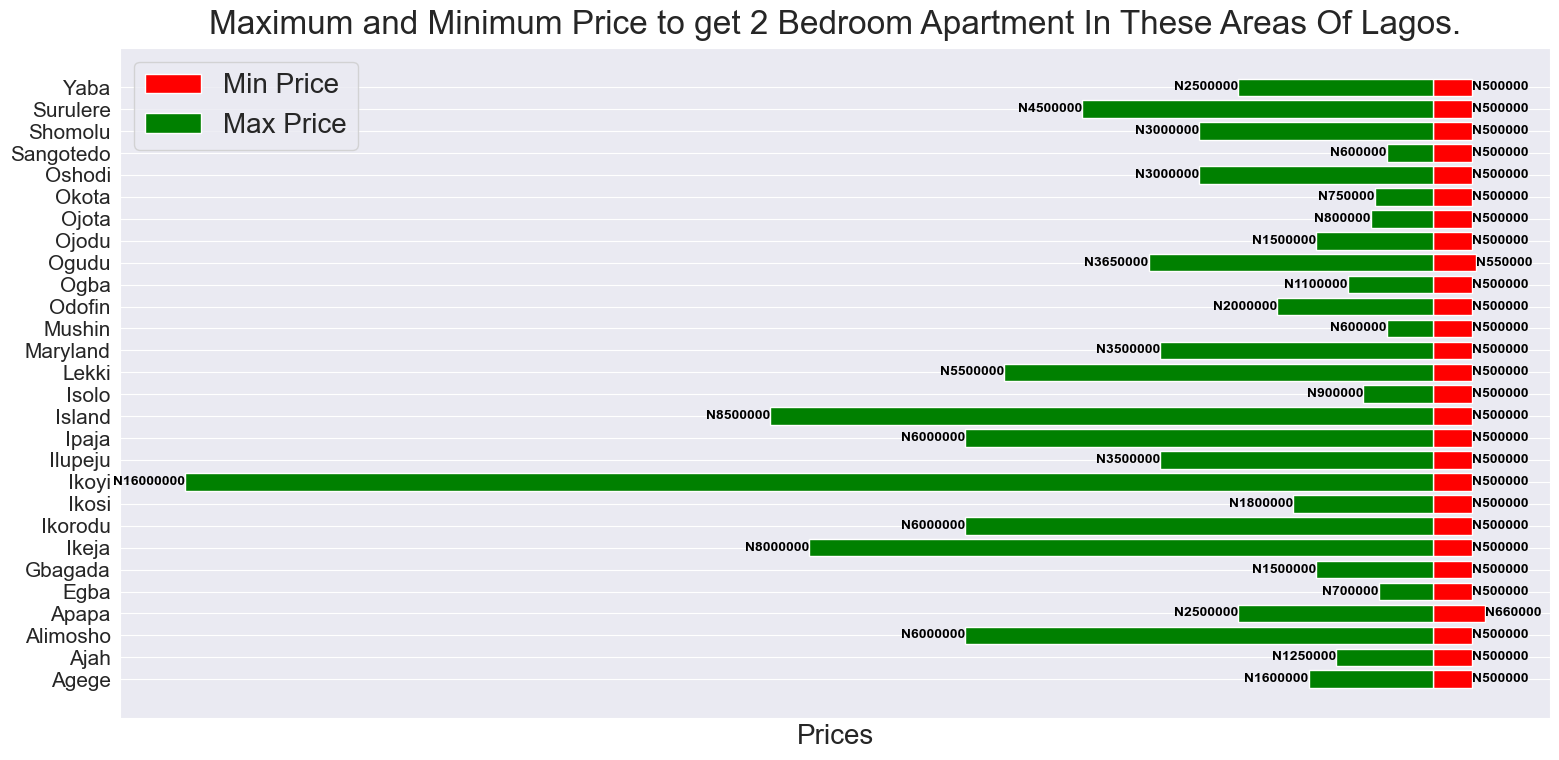

In [68]:
# Create the bidirectional bar chart
fig, ax = plt.subplots(figsize=(16, 8))
ax.barh(agg_2bed['Area'], agg_2bed['min_price'], color='red', label='Min Price')
ax.barh(agg_2bed['Area'], -agg_2bed['max_price'], color='green', label='Max Price')


for i, value in enumerate(agg_2bed['min_price']):
    ax.text(value + 2, i, f'N{value}', va='center', ha='left', color='black', fontweight='bold', fontsize=10)

for i, value in enumerate(agg_2bed['max_price']):
    ax.text(-abs(value) -2, i, f'N{abs(value)}', va='center', ha='right', color='black', fontweight='bold', fontsize=10)

ax.set_xticks([])
# Customize the plot

#ax.set_xlim(-5.5e6, 1.5e6)  # Set the x-axis limits
ax.set_xlabel('Prices')
ax.set_title('Maximum and Minimum Price to get 2 Bedroom Apartment In These Areas Of Lagos.', pad=10)
ax.legend(loc='upper left')


plt.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

The image illustrates the rental price range for 2-bedroom apartments in various areas of Lagos. It shows two bars for each area, indicating the minimum and maximum prices. Areas like Lekki, Ikeja, surulere, ikoyi, Victoria Island and ikorodu are on the higher end of the price spectrum, while places like  Egba, Mushin, Sangotedo and Agege, among others are more affordable.


# 3 Bedrooms Apartments

In [69]:
df_3bedroom= cleaned_rent_df[cleaned_rent_df['Bedrooms'].isin(['3 bedroom'])].sort_values("Price", ascending=False)
df_3bedroom

,Price,Pid,Bedrooms,rent_type,house_property,House_Address,Area,place,Latitude,Longitude
5159,80000000,G4426,3 bedroom,Flat,Apartment for rent Victoria Island Extension ...,Victoria Island Victoria Island Extension Vict...,Island,Lagos,6.428056,3.421944
4699,50000000,G5738,3 bedroom,Commercial Property for rent Osborne Foreshore...,None,Osborne Osborne Foreshore Estate,Ikoyi,Lagos,NaN,NaN
1434,40000000,H3625,3 bedroom,Duplex for rent Opic Isheri North,None,Isheri North Gra Opic Isheri North,Ojodu,Lagos,NaN,NaN
7826,40000000,"30,F7910",3 bedroom,Flat,Apartment for rent Falomo,Glover Road Falomo,Ikoyi,Lagos,NaN,NaN
6832,24000000,"24,G0551",3 bedroom,Flat,Apartment for rent Ikoyi S.W,Ikoyi Ikoyi S.W,Ikoyi,Lagos,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
9788,42000,F1768,3 bedroom,Flat,Apartment for rent Bourdillon,Cooper Road Bourdillon,Ikoyi,Lagos,NaN,NaN
9789,35000,F1767,3 bedroom,Flat,Apartment for rent Bourdillon,Cooper Road Bourdillon,Ikoyi,Lagos,NaN,NaN
340,35000,H5345,3 bedroom,Flat,Apartment for rent Osborne Foreshore Estate,"7Th Street, Victoria'S Place, Osborne Estate P...",Ikoyi,Lagos,NaN,NaN
2123,25000,"90,G4210",3 bedroom,Commercial Property for rent agness Sabo,None,Montgomery Rd Yaba Agness Sabo,Yaba,Lagos,6.454070,3.394670


In [70]:
df_3bedroom_filtered = df_3bedroom[(df_3bedroom['Price'] <= 30000000) & (df_3bedroom['Price'] >= 500000)].sort_values("Price",ascending=False)

df_3bedroom_filtered

,Price,Pid,Bedrooms,rent_type,house_property,House_Address,Area,place,Latitude,Longitude
6832,24000000,"24,G0551",3 bedroom,Flat,Apartment for rent Ikoyi S.W,Ikoyi Ikoyi S.W,Ikoyi,Lagos,NaN,NaN
5256,24000000,G4217,3 bedroom,Office Space for rent After the Link Bridge Opebi,None,After The Link Bridge Opebi,Ikeja,Lagos,NaN,NaN
1513,22000000,H3491,3 bedroom,Flat,Apartment for rent Banana Island,Ocean Parade Banana Island,Ikoyi,Lagos,NaN,NaN
7335,21000000,F9378,3 bedroom,Flat,Apartment for rent Banana Island,Ocean Parade Banana Island,Ikoyi,Lagos,NaN,NaN
7794,21000000,F8001,3 bedroom,Flat,Apartment for rent Old Ikoyi,Glover Old Ikoyi,Ikoyi,Lagos,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1067,500000,H4089,3 bedroom,Flat,Apartment for rent Opic Isheri North,Opic Opic Isheri North,Ojodu,Lagos,NaN,NaN
6151,500000,D8010,3 bedroom,Flat,"Apartment for rent Opp. Arepo, off lagos Ibad...","Forthright Estate Opp. Arepo, Off Lagos Ibadan...",Ojodu,Lagos,NaN,NaN
6194,500000,G2069,3 bedroom,Flat,Apartment for rent Aguda,Martins Street Aguda Surulere Aguda,Surulere,Lagos,NaN,NaN
2449,500000,H1477,3 bedroom,Flat,Apartment for rent LSDPC estate,Lsdpc Low Cost Housing Estate Lsdpc Estate,Agege,Lagos,NaN,NaN


In [71]:
stat_view3 = df_3bedroom_filtered.Price.describe().reset_index()
stat_view3.columns = ['statistics', 'value']
stat_view3

,statistics,value
0,count,3.690000e+03
1,mean,2.056419e+06
2,std,2.622723e+06
3,min,5.000000e+05
4,25%,8.000000e+05
5,50%,1.200000e+06
6,75%,2.000000e+06
7,max,2.400000e+07


In [72]:
stat_filtered3 = stat_view3.loc[[1, 3, 5, 7]]

In [73]:
fig = px.bar(stat_filtered3, x='statistics', y='value',color='value',
             text='value', opacity=1)

#Customize the y-axis tick labels
fig.update_layout(
                    height=400,template='plotly_dark',
                    font=dict(family="Arial", size=13, color="white"),
                    xaxis_title="Price",  # Added x-axis title
                    title="Average, Min, Middle And Max Price To Rent 3 Bedrooms in Lagos",
                    title_font=dict(size=18),
                    title_x=0.5, title_y=0.95, title_xanchor='center',
                    )
fig.update_traces(texttemplate=' N%{text:.0f}', textfont_size=20, textsrc="white",textposition="outside",marker_color=['orange','red','purple','green'])
fig.update_yaxes(showgrid=True, range=[0, 25e6 +1.7e6])

fig.show()

This graph provides a quick overview of the rental market for 3-bedroom apartments in Lagos, showing a wide range of prices that potential renters can expect.

- The **average** (mean) rental price to rent 3-bedroom in lagos is **₦2,000,000** and above.
- The **minimum** price found is **₦500,000**.
- The **middle** price, where half of the prices are less and half are more, is **₦1,200,000**.
- The **maximum** price observed is **₦24,000,000** and more than.





**Getting the mean prices of the areas in the data**

In [74]:
grouped_df3=  df_3bedroom_filtered.groupby("Area")[["Price"]].mean().reset_index().sort_values("Price", ascending=False)
grouped_df3

,Area,Price
12,Ikoyi,8.763675e+06
15,Island,5.065469e+06
3,Apapa,2.650000e+06
19,Lekki,2.545000e+06
20,Maryland,2.494444e+06
9,Ikeja,2.228938e+06
13,Ilupeju,2.022222e+06
17,Ketu,1.500000e+06
11,Ikosi,1.210417e+06
24,Ogudu,1.207018e+06


In [75]:
fig = px.bar(grouped_df3, x='Price', y='Area', orientation='h',
             color="Price",
            text='Price', opacity=1,  color_continuous_scale="reds",)

#Customize the y-axis tick labels
fig.update_layout(yaxis={"dtick":1, 'categoryorder':'total ascending'}, height=550,template='plotly_dark',
                  
                    
                    font=dict(family="Arial", size=10, color="white"),
                    xaxis_tickformat="",
                    xaxis_title=" Average Price",  # Added x-axis title
                    title="Average Price To Rent 3 Bedroom Flat in Lagos",
                    title_font=dict(size=18),
                    
                    )
fig.update_traces(texttemplate=' N%{text:.0f}', textfont_size=20, textposition="outside", textsrc="blue")
fig.update_xaxes(showgrid=False, range=[0, 8.5e6 + 1e6])
#yaxis_title="Population (2023)",  font=dict(family="Arial", size=13))
fig.show()

This color-coded bars and the overlay of red bars provides a comprehensive view of the rental market for 3-bedroom flats across different areas in Lagos, which can be useful for potential renters or real estate investors to identify areas that match their budget and preferences.

- **Ikoyi Island** has the highest average rental price at **₦8,500,000** followed by **Victoria Island** with a whooping amount slightly above **N5,000,000**
- **Apapa, Lekki, Maryland, Ikeja** follow with average prices of **₦2,00,000** but not above **₦3,000,000** respectively.
- **Maryland**, **Ikeja**, and **Ketu** offer mid-range options with prices between **₦1,702,222** and **₦2,022,222**.
- More affordable areas include **Ogudu**, **Yaba**, and **Gbagada**, with average prices ranging from **₦1,180,455** to **₦1,201,879**.
- The least expensive areas for renting a 2-bedroom flat are **Egba, Lagos Mainland, Mushin, Orile**, among others with prices below **₦700,000**.





 ## Also Aggregating the Price to find the Maximum and Minimum Price one can get a bedroom in these areas

In [76]:
agg_3bed = df_3bedroom_filtered.groupby("Area")[["Price"]].agg((['mean', 'max', 'min'])).reset_index()
agg_3bed

Area         Price                   
                       mean       max      min
0       Agege  1.029545e+06   7000000   500000
1        Ajah  1.000528e+06   4000000   500000
2    Alimosho  6.411111e+05   1000000   500000
3       Apapa  2.650000e+06  10000000   600000
4        Egba  6.209677e+05   1200000   500000
5      Ejigbo  7.000000e+05    700000   700000
6     Gbagada  1.186842e+06   4000000   500000
7       Idimu  6.625000e+05    800000   500000
8      Igando  6.333333e+05    850000   500000
9       Ikeja  2.228938e+06  24000000   500000
10    Ikorodu  7.400000e+05   2500000   500000
11      Ikosi  1.210417e+06   3000000   500000
12      Ikoyi  8.763675e+06  24000000  1000000
13    Ilupeju  2.022222e+06   7000000   600000
14      Ipaja  7.666667e+05   5500000   500000
15     Island  5.065469e+06  15000000  2450000
16      Isolo  9.877358e+05  11000000   500000
17       Ketu  1.500000e+06   1500000  1500000
18      Lagos  5.833333e+05    700000   500000
19      Lekki  2.545000e+06  19000000   500000
20   Maryland  2.494444e+06  12000000   900000
21     Mushin  6.250000e+05    700000   550000
22     Odofin  9.580645e+05   2100000   500000
23       Ogba  1.014634e+06  10000000   500000
24      Ogudu  1.207018e+06   2000000   600000
25      Ojodu  8.425856e+05   3500000   500000
26      Ojota  8.666667e+05   1200000   700000
27      Okota  7.026667e+05   1000000   500000
28      Orile  5.000000e+05    500000   500000
29     Oshodi  6.673913e+05   1100000   500000
30  Sangotedo  7.300000e+05   1200000   500000
31    Shomolu  8.418478e+05   2000000   500000
32   Surulere  1.140315e+06   6000000   500000
33       Yaba  1.201799e+06   9000000   500000

In [77]:
agg_3bed.columns = ['Area', 'mean_price', 'max_price', 'min_price']
agg_3bed.loc[[28, 5, 19], 'max_price'] = 1600000, 1000000,30e6
agg_3bed.loc[[19, 1], 'min_price'] = 1e6,1e6

agg_3bed

,Area,mean_price,max_price,min_price
0,Agege,1.029545e+06,7000000.0,500000.0
1,Ajah,1.000528e+06,4000000.0,1000000.0
2,Alimosho,6.411111e+05,1000000.0,500000.0
3,Apapa,2.650000e+06,10000000.0,600000.0
4,Egba,6.209677e+05,1200000.0,500000.0
5,Ejigbo,7.000000e+05,1000000.0,700000.0
6,Gbagada,1.186842e+06,4000000.0,500000.0
7,Idimu,6.625000e+05,800000.0,500000.0
8,Igando,6.333333e+05,850000.0,500000.0
9,Ikeja,2.228938e+06,24000000.0,500000.0


### Creating a bidirectional barchart to visualize the aggregated price

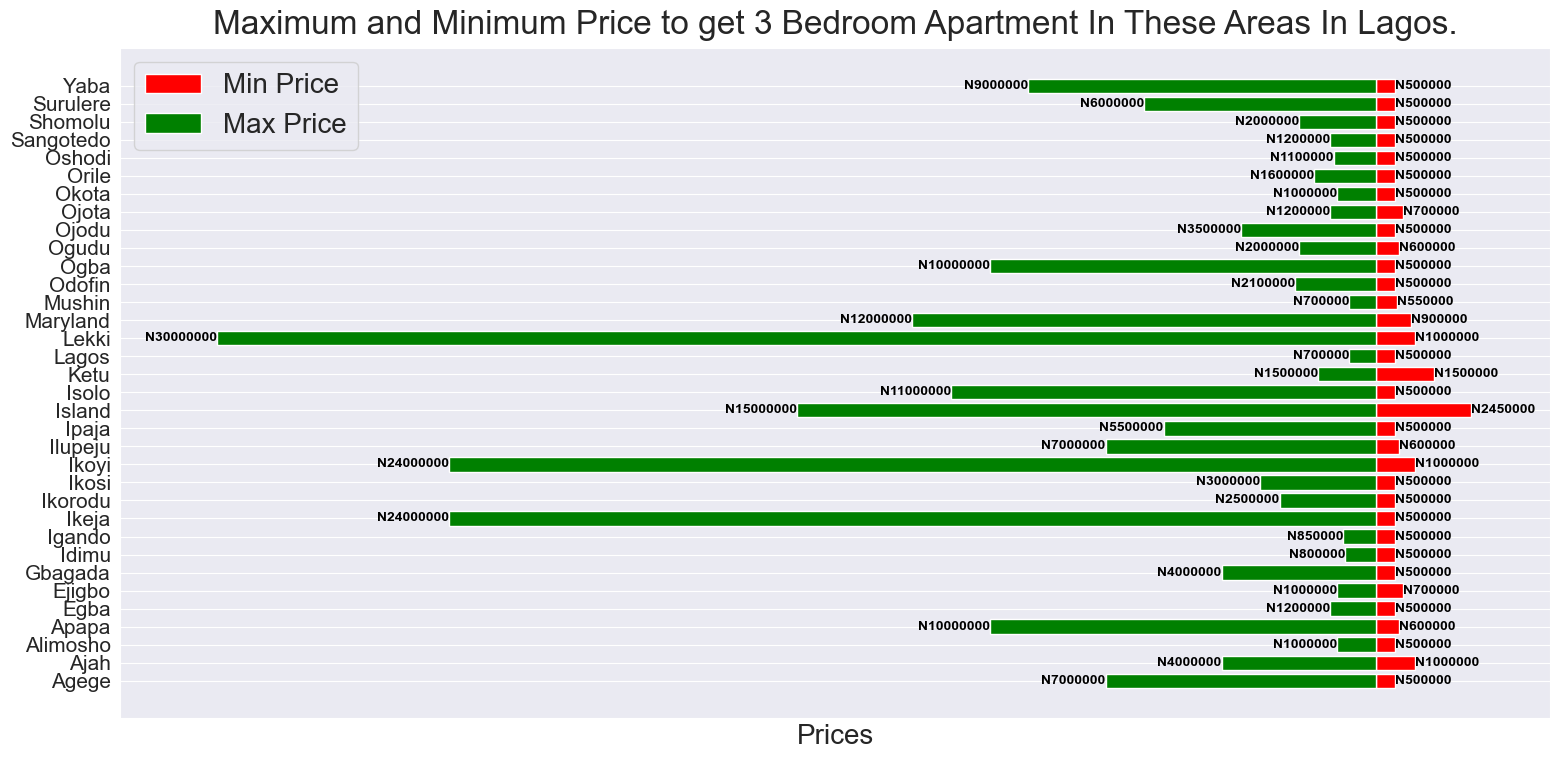

In [78]:
# Create the bidirectional bar chart
fig, ax = plt.subplots(figsize=(16, 8))
ax.barh(agg_3bed['Area'], agg_3bed['min_price'], color='red', label='Min Price')
ax.barh(agg_3bed['Area'], -agg_3bed['max_price'], color='green', label='Max Price')


for i, value in enumerate(agg_3bed['min_price']):
    ax.text(value + 2, i, f'N{value:.0f}', va='center', ha='left', color='black', fontweight='bold', fontsize=10)

for i, value in enumerate(agg_3bed['max_price']):
    ax.text(-abs(value) -2, i, f'N{abs(value):.0f}', va='center', ha='right', color='black', fontweight='bold', fontsize=10)

ax.set_xticks([])
# Customize the plot

ax.set_xlim(-32.5e6, 4.5e6)  # Set the x-axis limits
ax.set_xlabel('Prices')
ax.set_title('Maximum and Minimum Price to get 3 Bedroom Apartment In These Areas In Lagos.', pad=10)
ax.legend(loc='upper left')




plt.tick_params(axis='y', labelsize=15)

plt.tight_layout()
plt.show()

The above figure illustrates the rental price range for 3-bedroom apartments in various areas of Lagos. It shows two bars for each area, indicating the minimum and maximum prices.

**Remember, these prices listed in this dataset are subject to change and should be verified with current market rates for accuracy.**

In [79]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly import offline

# Structuring the subplots
fig = make_subplots(rows=2,cols=2, 
                    subplot_titles=("Average, Min, Middle And Max Price To Rent A Self-Contain in Lagos", 
                                    "Average, Min, Middle And Max Price To Rent 1 Bedroom in Lagos", 
                                    "Average, Min, Middle And Max Price To Rent 2 Bedrooms in Lagos",
                                    "Average, Min, Middle And Max Price To Rent 3 Bedrooms in Lagos",
                                    ),
                    specs= [[{}, {}],
                            [{}, {}],],
                    horizontal_spacing=0.2, #10% of figure width
                    vertical_spacing=0.11, #5% of figure height
                    column_widths=[0.5, 0.5], #first column is wider
                    row_heights=[0.3, 0.3], # Third row is taller
                    
                    )

#Self Contain
fig.add_trace(go.Bar(x=stat_filtered["statistics"],
                     y=stat_filtered["value"], 
                    
                     text=stat_filtered['value'], 
                     textposition='outside'),row=1, col=1,
                     )
fig.update_traces(texttemplate=' N%{text:.0f}', textfont_size=20, textsrc="white",textposition="outside",
                  marker_color=['orange','red','purple','green'],row=1, col=1)






#1 Bedroom
fig.add_trace(go.Bar(x=stat_filtered1['statistics'],
                     y=stat_filtered1['value'], 
                     text=stat_filtered1['value'], 
                     textposition='outside'),
                     row=1, col=2)
fig.update_traces(texttemplate=' N%{text:.0f}', textfont_size=20, textsrc="white",textposition="outside",
                  marker_color=['orange','red','purple','green'],row=1, col=2)



#2 Bedroom
fig.add_trace(go.Bar(x=stat_filtered2['statistics'],
                     y=stat_filtered2['value'], 
                     text=stat_filtered2['value'], 
                     textposition='outside'),
                     row=2, col=1)
fig.update_traces(texttemplate=' N%{text:.0f}', textfont_size=20, textsrc="white",textposition="outside",
                  marker_color=['orange','red','purple','green'],row=2, col=1)




#3 Bedroom
fig.add_trace(go.Bar(x=stat_filtered3['statistics'],
                     y=stat_filtered3['value'], 
                     text=stat_filtered3['value'], 
                     textposition='outside'),
                     row=2, col=2)
fig.update_traces(texttemplate=' N%{text:.0f}', textfont_size=20, textsrc="white",textposition="outside",
                  marker_color=['orange','red','purple','green'],row=2, col=2)

 




#Update the figure layout
fig.update_layout(height=600, width=1000,template="plotly_dark", title_text="Rent Dashboard",
                  
                  title_x=0.5, title_y=0.95, title_xanchor='center',
                 )
#Adjusting the text sizes of the ticks
fig.update_xaxes(tickfont=dict(size=8), )
fig.update_yaxes(tickfont=dict(size=8))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False, range=[0, 1500000 +300000], row=1,col=1)
fig.update_yaxes(showgrid=False, range=[0, 5e6 +4e5],row=1, col=2)
fig.update_yaxes(showgrid=True, range=[0, 16e6 +1.7e6],row=2, col=1)
fig.update_yaxes(showgrid=False,  range=[0, 25e6 +1.7e6], row=2, col=2)

# Update subplot titles font size
fig.update_annotations(font=dict(size=10))  # Adjust the size as needed
fig.show()

# Extras

# Analyzing some of the most expensive neighbourhood in Lagos

# Lekki

Lekki is a city in Lagos State, Nigeria, known for its beautiful beaches, luxurious resorts, and vibrant nightlife. It’s a popular area that offers a mix of residential and commercial properties, with many attractions for both locals and tourists. 

<img src="lekki.jpg" width="400" height="400"/>

In [80]:
self_con_filtered[self_con_filtered["Area"] == "Lekki"]

,Price,Pid,Bedrooms,rent_type,house_property,House_Address,Area,place,Latitude,Longitude
727,1200000,H4704,Self Contain,for rent Lekki Phase 1,None,Lekki Phase 1 Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
2657,900000,H1041,Self Contain,for rent Lekki Phase 1,None,Chief Collins Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
3482,750000,G9045,Self Contain,for rent,None,Ladipo Latinwo,Lekki,Lagos,6.472516,3.568616
513,750000,H5059,Self Contain,for rent Lekki ph 1 Lekki Phase 1,None,Lekki Phase 1 Lekki Ph 1 Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
631,650000,H2275,Self Contain,for rent iLasan opposite Nicon Town Ikate,None,Bencom Ilasan Opposite Nicon Town Ikate,Lekki,Lagos,6.472516,3.568616
4990,600000,G4953,Self Contain,for rent Lekki Phase 1,None,Lekki Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
2763,600000,H0772,Self Contain,for rent jakande roundabout Jakande,None,By Shop Rite Jakande Roundabout Jakande,Lekki,Lagos,6.472516,3.568616
8047,600000,F7085,Self Contain,for rent Lekki Phase 1,None,Lekki Phase 1 Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
680,550000,H4776,Self Contain,for rent chevron,None,Chevy View Estate Chevron,Lekki,Lagos,6.472516,3.568616
3394,500000,G9239,Self Contain,for rent by meadow hall school Lekki Phase 1,None,Horizon 2 Estate By Meadow Hall School Lekki P...,Lekki,Lagos,6.472516,3.568616


In [81]:
# Replacing the "Lekki Phase 1 Lekki Ph 1 Lekki Phase 1" values with Lekki Phase 1
self_con_lekki = self_con_filtered[self_con_filtered["Area"] == "Lekki"]
self_con_lekki.loc[[727, 513,4990, 8047],'House_Address' ]= 'Lekki Phase 1'
self_con_lekki

,Price,Pid,Bedrooms,rent_type,house_property,House_Address,Area,place,Latitude,Longitude
727,1200000,H4704,Self Contain,for rent Lekki Phase 1,None,Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
2657,900000,H1041,Self Contain,for rent Lekki Phase 1,None,Chief Collins Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
3482,750000,G9045,Self Contain,for rent,None,Ladipo Latinwo,Lekki,Lagos,6.472516,3.568616
513,750000,H5059,Self Contain,for rent Lekki ph 1 Lekki Phase 1,None,Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
631,650000,H2275,Self Contain,for rent iLasan opposite Nicon Town Ikate,None,Bencom Ilasan Opposite Nicon Town Ikate,Lekki,Lagos,6.472516,3.568616
4990,600000,G4953,Self Contain,for rent Lekki Phase 1,None,Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
2763,600000,H0772,Self Contain,for rent jakande roundabout Jakande,None,By Shop Rite Jakande Roundabout Jakande,Lekki,Lagos,6.472516,3.568616
8047,600000,F7085,Self Contain,for rent Lekki Phase 1,None,Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
680,550000,H4776,Self Contain,for rent chevron,None,Chevy View Estate Chevron,Lekki,Lagos,6.472516,3.568616
3394,500000,G9239,Self Contain,for rent by meadow hall school Lekki Phase 1,None,Horizon 2 Estate By Meadow Hall School Lekki P...,Lekki,Lagos,6.472516,3.568616


In [82]:
fig = px.bar(self_con_lekki, x='Price', y='House_Address', orientation='h',color='Price',
             #hover_data=["Name","Global_Sales", "Publisher", "Year"],
             color_continuous_scale="ylorbr",
            
            text='Price', opacity=1)

#Customize the y-axis tick labels
fig.update_layout(yaxis={"dtick":1, 'categoryorder':'total ascending'},
                    height=500,template='plotly_dark',
                    font=dict(family="Arial", size=12, color="orange"),
                    xaxis_tickformat=",",
                    xaxis_title="Prices",  # Added x-axis title
                    title="Areas Where To Rent A Self-Contain And Their Prices In Lekki(Max to Min)",
                    title_font=dict(size=18),
                    title_x=0.5, title_y=0.95, title_xanchor='center',
                    )
fig.update_traces(texttemplate=' N%{text:.0f}', textfont_size=13, textsrc="white")

#yaxis_title="Population (2023)",  font=dict(family="Arial", size=13))
fig.show()

In [83]:
df1_bed = df_1bedroom_filtered[df_1bedroom_filtered["Area"] == "Lekki"].head(40)
df1_bed

,Price,Pid,Bedrooms,rent_type,house_property,House_Address,Area,place,Latitude,Longitude
1096,5000000,H4047,1 bedroom,mini flat House for rent Lekki Phase 1,None,Lekki Phase 1 Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
1821,3000000,H2807,1 bedroom,mini flat Flat,Apartment for rent Elegushi Ikate,Romay Garden Elegushi Ikate,Lekki,Lagos,6.472516,3.568616
4168,2800000,G4230,1 bedroom,mini flat Office Space for rent Maruwa round a...,None,Emmauel Ayo Street Lekki Maruwa Round About Le...,Lekki,Lagos,6.472516,3.568616
335,2500000,H0747,1 bedroom,mini flat Office Space for rent Lekki Phase 1,None,Admiralty Way Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
6197,2500000,"48,G2064",1 bedroom,mini flat Office Space for rent Lekki Phase 1,None,Lekki Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
2691,2500000,H0949,1 bedroom,mini flat Flat,Apartment for rent,Goshen Estate,Lekki,Lagos,6.472516,3.568616
8769,2000000,F5064,1 bedroom,mini flat Shop for rent Oniru Lekki Phase 1,None,Market Street Oniru Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
4987,2000000,G4956,1 bedroom,mini flat Flat,Apartment for rent Lekki Phase 1,Lekki Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
2226,2000000,H1904,1 bedroom,mini flat Flat,Apartment for rent Lekki Phase 1,Off Oniru Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
2751,1800000,H0824,1 bedroom,mini flat Shop for rent Lekki Right Lekki Phase 1,None,Lekki Right Lekki Phase 1,Lekki,Lagos,6.472516,3.568616


In [84]:
# Replacing the Lekki Phase 1 Lekki Ph 1 Lekki Phase 1 values with Lekki Phase 1
df1_bed_lekki = df1_bed[df1_bed["Area"] == "Lekki"]
df1_bed_lekki.loc[[1096, 6197,4987, 6387,5578],'House_Address' ]= 'Lekki Phase 1'
df1_bed_lekki

,Price,Pid,Bedrooms,rent_type,house_property,House_Address,Area,place,Latitude,Longitude
1096,5000000,H4047,1 bedroom,mini flat House for rent Lekki Phase 1,None,Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
1821,3000000,H2807,1 bedroom,mini flat Flat,Apartment for rent Elegushi Ikate,Romay Garden Elegushi Ikate,Lekki,Lagos,6.472516,3.568616
4168,2800000,G4230,1 bedroom,mini flat Office Space for rent Maruwa round a...,None,Emmauel Ayo Street Lekki Maruwa Round About Le...,Lekki,Lagos,6.472516,3.568616
335,2500000,H0747,1 bedroom,mini flat Office Space for rent Lekki Phase 1,None,Admiralty Way Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
6197,2500000,"48,G2064",1 bedroom,mini flat Office Space for rent Lekki Phase 1,None,Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
2691,2500000,H0949,1 bedroom,mini flat Flat,Apartment for rent,Goshen Estate,Lekki,Lagos,6.472516,3.568616
8769,2000000,F5064,1 bedroom,mini flat Shop for rent Oniru Lekki Phase 1,None,Market Street Oniru Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
4987,2000000,G4956,1 bedroom,mini flat Flat,Apartment for rent Lekki Phase 1,Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
2226,2000000,H1904,1 bedroom,mini flat Flat,Apartment for rent Lekki Phase 1,Off Oniru Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
2751,1800000,H0824,1 bedroom,mini flat Shop for rent Lekki Right Lekki Phase 1,None,Lekki Right Lekki Phase 1,Lekki,Lagos,6.472516,3.568616


In [85]:
fig = px.bar(df1_bed_lekki, x='Price', y='House_Address', orientation='h',color='Price',
             hover_data=["Area","House_Address", "Price"],
             color_continuous_scale="ylorbr",
            
            text='Price', opacity=1)

#Customize the y-axis tick labels
fig.update_layout(yaxis={"dtick":1, 'categoryorder':'total ascending'},
                    height=500,template='plotly_dark',
                    font=dict(family="Arial", size=8, color="orange"),
                    xaxis_tickformat=",",
                    xaxis_title="Prices",  # Added x-axis title
                    title="Areas Where To Rent 1-Bedroom And Their Prices In Lekki(Max to Min)",
                    title_font=dict(size=18),
                    title_x=0.5, title_y=0.95, title_xanchor='center',
                    )
fig.update_traces(texttemplate=' N%{text:.0f}', textfont_size=13, textsrc="white",textposition="outside")
fig.update_xaxes(showgrid=False, range=[0, 14e6  + 2e6])
#yaxis_title="Population (2023)",  font=dict(family="Arial", size=13))
fig.show()

In [87]:
df2_bed = df_2bedroom_filtered[df_2bedroom_filtered["Area"] == "Lekki"].head(20)
df2_bed

,Price,Pid,Bedrooms,rent_type,house_property,House_Address,Area,place,Latitude,Longitude
5959,5500000,G2561,2 bedroom,Flat,Apartment for rent Lekki Phase 1,Itumo Street Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
3954,5000000,G7856,2 bedroom,Flat,Apartment for rent Lekki phase I Lekki Phase 1,Lekki Phase I Lekki Phase I Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
2978,5000000,G5544,2 bedroom,Flat,Apartment for rent Lekki Phase 1,Lekki Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
2334,5000000,H1704,2 bedroom,Flat,Apartment for rent Off Admiralty Way Lekki Ph...,Itumoh Ogbonna Off Admiralty Way Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
6951,5000000,G0291,2 bedroom,Flat,Apartment for rent Lekki Phase 1,Oniru Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
3695,5000000,G8585,2 bedroom,Flat,Apartment for rent Lekki Phase 1,Phase1 Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
9822,4500000,F1558,2 bedroom,Flat,"Apartment for rent Oniru, Lekki Phase 1","Oniru, Lekki Phase 1",Lekki,Lagos,6.472516,3.568616
1687,4000000,H3059,2 bedroom,Flat,Apartment for rent Lekki Phase 1,Lekki Phase 1 Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
1693,4000000,H3052,2 bedroom,Flat,Apartment for rent Lekki Phase 1,Lekki Phase 1 Lekki Phase 1,Lekki,Lagos,6.472516,3.568616
7929,3500000,F7559,2 bedroom,Flat,Apartment for rent Lekki Phase 1,Lekki Phase 1 Lekki Phase 1,Lekki,Lagos,6.472516,3.568616


In [89]:
fig = px.bar(df2_bed, x='Price', y='House_Address', orientation='h',color='Price',
             #hover_data=["Name","Global_Sales", "Publisher", "Year"],
             color_continuous_scale="ylorbr",
            
            text='Price', opacity=1)

#Customize the y-axis tick labels
fig.update_layout(yaxis={"dtick":1, 'categoryorder':'total ascending'},
                    height=500,template='plotly_dark',
                    font=dict(family="Arial", size=12, color="orange"),
                    xaxis_tickformat=",",
                    xaxis_title="Prices",  # Added x-axis title
                    title="Areas Where To Rent A 2 Bed And Their Prices In Lekki(Max to Min)",
                    title_font=dict(size=18),
                    title_x=0.5, title_y=0.95, title_xanchor='center',
                    )
fig.update_traces(texttemplate=' N%{text:.0f}', textfont_size=13, textsrc="white")

#yaxis_title="Population (2023)",  font=dict(family="Arial", size=13))
fig.show()